# 1 Combine datasets so EDA can be performed on final dataset

## 1.1 Import libraries

In [1]:
import pandas as pd

## 1.2 Read all relevant data

In [2]:
# Read all data
print('-----Initial dataframes----')
articles = pd.read_csv('data/articles.csv')
print('Articles Dataframe shape:',articles.shape)
print('Articles Columns:',list(articles.columns))

customers = pd.read_csv('data/customers.csv')
print('\nCustomers Dataframe shape:',customers.shape)
print('Customers Columns:',list(customers.columns))

transactions = pd.read_csv('data/transactions_train.csv')
print('\nTransactions Dataframe shape:',transactions.shape)
print('Transactions Columns:',list(transactions.columns))

-----Initial dataframes----
Articles Dataframe shape: (105542, 25)
Articles Columns: ['article_id', 'product_code', 'prod_name', 'product_type_no', 'product_type_name', 'product_group_name', 'graphical_appearance_no', 'graphical_appearance_name', 'colour_group_code', 'colour_group_name', 'perceived_colour_value_id', 'perceived_colour_value_name', 'perceived_colour_master_id', 'perceived_colour_master_name', 'department_no', 'department_name', 'index_code', 'index_name', 'index_group_no', 'index_group_name', 'section_no', 'section_name', 'garment_group_no', 'garment_group_name', 'detail_desc']

Customers Dataframe shape: (1371980, 7)
Customers Columns: ['customer_id', 'FN', 'Active', 'club_member_status', 'fashion_news_frequency', 'age', 'postal_code']

Transactions Dataframe shape: (31788324, 5)
Transactions Columns: ['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id']


In [3]:
# Subset relevant columns
print('-----Filtered dataframes----')

articles_cols = ['article_id', 'prod_name', 'product_type_name', 'product_group_name', \
                 'graphical_appearance_name', 'colour_group_name', \
                 'perceived_colour_value_name', 'perceived_colour_master_name', \
                 'department_name', 'index_name', 'index_group_name', 'section_name', \
                 'garment_group_name', 'detail_desc']
articles = articles.loc[:,articles_cols]

customers_cols = ['customer_id', 'club_member_status', 'fashion_news_frequency', 'age', 'postal_code']
customers = customers.loc[:,customers_cols]

print('Articles Dataframe shape:',articles.shape)
print('Articles Columns:',list(articles.columns))

print('\nCustomers Dataframe shape:',customers.shape)
print('Customers Columns:',list(customers.columns))

print('\nTransactions Dataframe shape:',transactions.shape)
print('Transactions Columns:',list(transactions.columns))

-----Filtered dataframes----
Articles Dataframe shape: (105542, 14)
Articles Columns: ['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name', 'detail_desc']

Customers Dataframe shape: (1371980, 5)
Customers Columns: ['customer_id', 'club_member_status', 'fashion_news_frequency', 'age', 'postal_code']

Transactions Dataframe shape: (31788324, 5)
Transactions Columns: ['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id']


## 1.3 Combine tables by performing Join

### 1.3.1 Join articles & transactions on article_id

In [4]:
df = pd.merge(transactions, articles, on=['article_id'])
print('Dataframe shape:',df.shape)
print('Columns:',list(df.columns))
df.head(2)

Dataframe shape: (31788324, 18)
Columns: ['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id', 'prod_name', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name', 'detail_desc']


,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
1,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,0.049475,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."


In [5]:
# Check articles
articles[articles['article_id']==663713001]

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
40179,663713001,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."


In [6]:
# Check transactions
transactions[transactions['article_id']==663713001].head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
10026,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,0.049475,2
14906,2018-09-20,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,0.050831,2
20662,2018-09-20,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,0.050831,1
26426,2018-09-20,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,0.050831,2


In [7]:
# Check combined_df of articles & transformations
df[df['article_id']==663713001].head()

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
1,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,0.049475,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
2,2018-09-20,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
3,2018-09-20,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,0.050831,1,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
4,2018-09-20,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."


### 1.3.2 Join customers & edited transactions on customer_id

In [8]:
df_final = pd.merge(df, customers, on=['customer_id'])
print('Dataframe shape:',df_final.shape)
print('Columns:',list(df_final.columns))
df_final.head(2)

Dataframe shape: (31788324, 22)
Columns: ['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id', 'prod_name', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name', 'detail_desc', 'club_member_status', 'fashion_news_frequency', 'age', 'postal_code']


,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,...,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,...,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,...,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [9]:
df_final.loc[0,'customer_id']

'000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318'

In [10]:
# Check customers
customers[customers['customer_id']=='000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318'].head()

,customer_id,club_member_status,fashion_news_frequency,age,postal_code
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [11]:
# Check combined df of articles and transformations
df[df['customer_id']=='000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318'].head()

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
26,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
633,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,Rae Push (Melbourne) 2p,Bra,Underwear,Solid,Light Pink,Dusty Light,Pink,Casual Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa..."
1963854,2019-03-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002,0.013542,2,Pluto OTS,Blouse,Garment Upper body,Stripe,Light Blue,Light,Blue,Blouse,Ladieswear,Ladieswear,Womens Casual,Blouses,Off-the-shoulder top in a cotton weave with el...
2939706,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,351484002,0.022017,2,Lazer Razer Brief,Swimwear bottom,Swimwear,Solid,Black,Dark,Black,Swimwear,Lingeries/Tights,Ladieswear,"Womens Swimwear, beachwear",Swimwear,"Fully lined bikini bottoms with a mid waist, m..."


In [12]:
# Check final combined df of customers and edited transformations
df_final[df_final['customer_id']=='000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318'].head()

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,...,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,...,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,...,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,Rae Push (Melbourne) 2p,Bra,Underwear,Solid,Light Pink,...,Casual Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa...",ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,2019-03-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002,0.013542,2,Pluto OTS,Blouse,Garment Upper body,Stripe,Light Blue,...,Blouse,Ladieswear,Ladieswear,Womens Casual,Blouses,Off-the-shoulder top in a cotton weave with el...,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
4,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,351484002,0.022017,2,Lazer Razer Brief,Swimwear bottom,Swimwear,Solid,Black,...,Swimwear,Lingeries/Tights,Ladieswear,"Womens Swimwear, beachwear",Swimwear,"Fully lined bikini bottoms with a mid waist, m...",ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


### 1.3.3 Export joined tables into CSV

In [13]:
print('-----Exporting final dataframe-----')
print('Final Dataframe shape:',df_final.shape)
print('Final Columns:',list(df_final.columns))

-----Exporting final dataframe-----
Final Dataframe shape: (31788324, 22)
Final Columns: ['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id', 'prod_name', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name', 'detail_desc', 'club_member_status', 'fashion_news_frequency', 'age', 'postal_code']


In [14]:
df_final.to_csv('final_df.csv',index=False)
print('Final combined dataframe exported successfully!')

Final combined dataframe exported successfully!


# 2 Exploratory Data Analysis on H&M Data

## 2.1 Import libraries and read data

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('final_df.csv')
print('Shape:',df.shape)
print('Columns:',df.columns)
df.head()

Shape: (31788324, 22)
Columns: Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id',
       'prod_name', 'product_type_name', 'product_group_name',
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name', 'perceived_colour_master_name',
       'department_name', 'index_name', 'index_group_name', 'section_name',
       'garment_group_name', 'detail_desc', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')


,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,...,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,...,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,...,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,Rae Push (Melbourne) 2p,Bra,Underwear,Solid,Light Pink,...,Casual Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa...",ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,2019-03-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002,0.013542,2,Pluto OTS,Blouse,Garment Upper body,Stripe,Light Blue,...,Blouse,Ladieswear,Ladieswear,Womens Casual,Blouses,Off-the-shoulder top in a cotton weave with el...,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
4,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,351484002,0.022017,2,Lazer Razer Brief,Swimwear bottom,Swimwear,Solid,Black,...,Swimwear,Lingeries/Tights,Ladieswear,"Womens Swimwear, beachwear",Swimwear,"Fully lined bikini bottoms with a mid waist, m...",ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


## 2.2 Preliminary data checks & Basic statistical analysis

In [3]:
# Check null values
for col in df.columns:
    print("Number of Null Values in", col, ": ", len(df[df[col].isna()]), "/", len(df))

Number of Null Values in t_dat :  0 / 31788324
Number of Null Values in customer_id :  0 / 31788324
Number of Null Values in article_id :  0 / 31788324
Number of Null Values in price :  0 / 31788324
Number of Null Values in sales_channel_id :  0 / 31788324
Number of Null Values in prod_name :  0 / 31788324
Number of Null Values in product_type_name :  0 / 31788324
Number of Null Values in product_group_name :  0 / 31788324
Number of Null Values in graphical_appearance_name :  0 / 31788324
Number of Null Values in colour_group_name :  0 / 31788324
Number of Null Values in perceived_colour_value_name :  0 / 31788324
Number of Null Values in perceived_colour_master_name :  0 / 31788324
Number of Null Values in department_name :  0 / 31788324
Number of Null Values in index_name :  0 / 31788324
Number of Null Values in index_group_name :  0 / 31788324
Number of Null Values in section_name :  0 / 31788324
Number of Null Values in garment_group_name :  0 / 31788324
Number of Null Values in de

In [4]:
# Replace na values
df['detail_desc'] = df['detail_desc'].fillna('')
df['club_member_status'] = df['club_member_status'].fillna('NONE')
df['fashion_news_frequency'] = df['fashion_news_frequency'].fillna('None')
df['fashion_news_frequency'] = df['fashion_news_frequency'].replace(['NONE'],'None')
df['detail_desc'] = df['detail_desc'].fillna('')
df['age'] = df['age'].fillna(-1)

# Check null values
for col in df.columns:
    print("Number of Null Values in", col, ": ", len(df[df[col].isna()]), "/", len(df))

Number of Null Values in t_dat :  0 / 31788324
Number of Null Values in customer_id :  0 / 31788324
Number of Null Values in article_id :  0 / 31788324
Number of Null Values in price :  0 / 31788324
Number of Null Values in sales_channel_id :  0 / 31788324
Number of Null Values in prod_name :  0 / 31788324
Number of Null Values in product_type_name :  0 / 31788324
Number of Null Values in product_group_name :  0 / 31788324
Number of Null Values in graphical_appearance_name :  0 / 31788324
Number of Null Values in colour_group_name :  0 / 31788324
Number of Null Values in perceived_colour_value_name :  0 / 31788324
Number of Null Values in perceived_colour_master_name :  0 / 31788324
Number of Null Values in department_name :  0 / 31788324
Number of Null Values in index_name :  0 / 31788324
Number of Null Values in index_group_name :  0 / 31788324
Number of Null Values in section_name :  0 / 31788324
Number of Null Values in garment_group_name :  0 / 31788324
Number of Null Values in de

In [5]:
# Check data types
df.dtypes

t_dat                            object
customer_id                      object
article_id                        int64
price                           float64
sales_channel_id                  int64
prod_name                        object
product_type_name                object
product_group_name               object
graphical_appearance_name        object
colour_group_name                object
perceived_colour_value_name      object
perceived_colour_master_name     object
department_name                  object
index_name                       object
index_group_name                 object
section_name                     object
garment_group_name               object
detail_desc                      object
club_member_status               object
fashion_news_frequency           object
age                             float64
postal_code                      object
dtype: object

In [6]:
# Convert datatypes to suitable datatypes
df = df.astype({'t_dat':'datetime64[ns]',
                'customer_id':'str',
                'article_id':'str',
                'price':'float',
                'sales_channel_id':'str',
                'prod_name':'category',
                'product_type_name':'category',
                'product_group_name':'category',
                'graphical_appearance_name':'category',
                'colour_group_name':'category',
                'perceived_colour_value_name':'category',
                'perceived_colour_master_name':'category',
                'department_name':'category',
                'index_name':'category',
                'index_group_name':'category',
                'section_name':'category',
                'garment_group_name':'category',
                'detail_desc':'str',
                'club_member_status':'category',
                'fashion_news_frequency':'category',
                'age':'int64',
                'postal_code':'category'})
df.dtypes

t_dat                           datetime64[ns]
customer_id                             object
article_id                              object
price                                  float64
sales_channel_id                        object
prod_name                             category
product_type_name                     category
product_group_name                    category
graphical_appearance_name             category
colour_group_name                     category
perceived_colour_value_name           category
perceived_colour_master_name          category
department_name                       category
index_name                            category
index_group_name                      category
section_name                          category
garment_group_name                    category
detail_desc                             object
club_member_status                    category
fashion_news_frequency                category
age                                      int64
postal_code  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 22 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   t_dat                         datetime64[ns]
 1   customer_id                   object        
 2   article_id                    object        
 3   price                         float64       
 4   sales_channel_id              object        
 5   prod_name                     category      
 6   product_type_name             category      
 7   product_group_name            category      
 8   graphical_appearance_name     category      
 9   colour_group_name             category      
 10  perceived_colour_value_name   category      
 11  perceived_colour_master_name  category      
 12  department_name               category      
 13  index_name                    category      
 14  index_group_name              category      
 15  section_name                  

In [8]:
# Check description
df.describe()

,price,age
count,3.178832e+07,3.178832e+07
mean,2.782927e-02,3.587485e+01
std,1.918113e-02,1.318195e+01
min,1.694915e-05,-1.000000e+00
25%,1.581356e-02,2.500000e+01
50%,2.540678e-02,3.100000e+01
75%,3.388136e-02,4.700000e+01
max,5.915254e-01,9.900000e+01


## 2.3 Correlation analysis

In [9]:
corr = df.corr()
corr

,price,age
price,1.000000,0.054437
age,0.054437,1.000000


In [10]:
# ax = sns.heatmap(df, linewidth = 0.5, cmap = 'coolwarm' )
  
# plt.title( "2-D Heat Map" )
# plt.show()

# > Kernel dies

## 2.4 Data Distribution
3 types: 
    (1) Categorical variables 
    (2) Numerical/Continuous variables 
    (3) Date variables

In [11]:
cat_var = ['prod_name', 'product_type_name', 'product_group_name', \
           'graphical_appearance_name', 'colour_group_name', \
           'perceived_colour_value_name', 'perceived_colour_master_name', \
           'department_name', 'index_name', 'index_group_name', 'section_name', \
           'garment_group_name', 'club_member_status', 'fashion_news_frequency', \
           'postal_code']

In [12]:
num_var = ['price', 'age']

In [13]:
date_var = ['t_dat']

### 2.4.1 Distribution of Categorical Variables
Categorical Variables: 
- [prod_name, product_type_name, product_group_name, graphical_appearance_name, colour_group_name, perceived_colour_value_name, perceived_colour_master_name, department_name, index_name, index_group_name, section_name, garment_group_name, club_member_status, fashion_news_frequency, postal_code]

In [14]:
def countplot(df, var_col, xticklabels, rank, rotate=False, horizontal=False):
    plt.figure(figsize=(10,5))
    if not horizontal:
        ax = sns.countplot(x=var_col, data=df)
        ax.set(xlabel=var_col, ylabel='Count')
        for p in ax.patches:
            ax.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', 
                        va='center', 
                        xytext=(0, 10), 
                        textcoords='offset points')
            
        ax.set_xticklabels(xticklabels)
        ax.get_xaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        if rotate:
            plt.xticks(rotation=90)

        max_height = max([x.get_height() for x in ax.patches])    
        plt.ylim(0, max_height*1.25)
        plt.title(f'Distribution of {var_col}')
    else:
        if rank == 'top 10':
            ax = sns.countplot(y=var_col, data=df, order=df[var_col].value_counts().iloc[:10].index)
            ax.set(xlabel='Count', ylabel=f'Top 10 {var_col}')
            
        elif rank == 'bottom 10':
            ax = sns.countplot(y=var_col, data=df, order=df[var_col].value_counts().iloc[-10:].index)
            ax.set(xlabel='Count', ylabel=f'Bottom 10 {var_col}')
            
        for p in ax.patches:
            ax.annotate(format(p.get_width(), '.0f'), 
            (p.get_x() + p.get_width() + 7, p.get_y() + p.get_height()), ha='center', va='center', 
            xytext=(25, 10), textcoords='offset points')

        ax.get_xaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        max_width = max([x.get_width() for x in ax.patches])    
        plt.xlim(0, max_width*1.25)
        plt.title(f'Distribution of {var_col}')
        plt.show()

Variable: prod_name


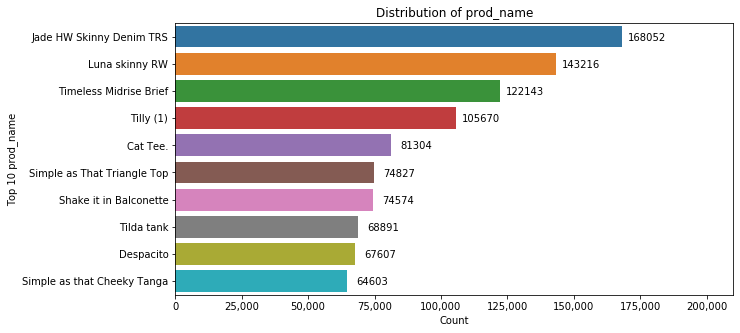

-------------
Variable: product_type_name


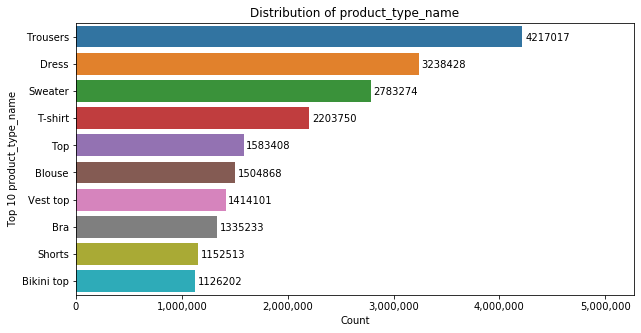

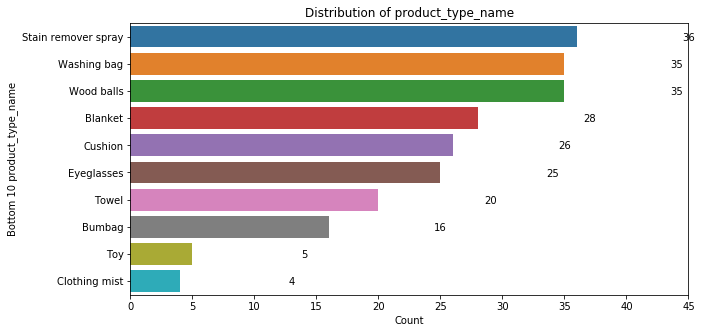

-------------
Variable: product_group_name


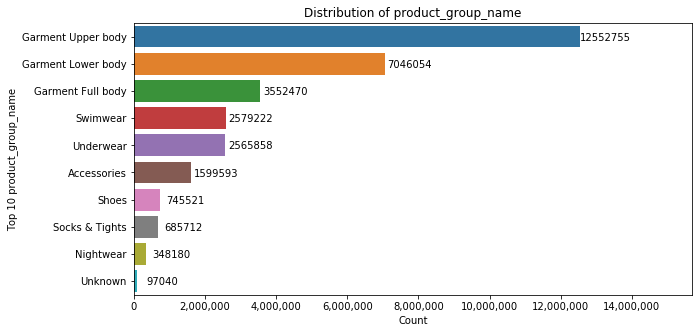

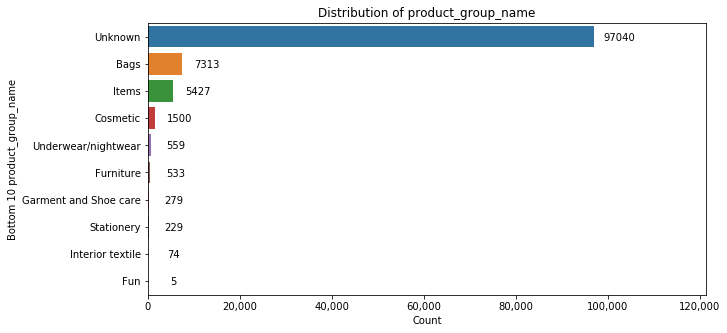

-------------
Variable: graphical_appearance_name


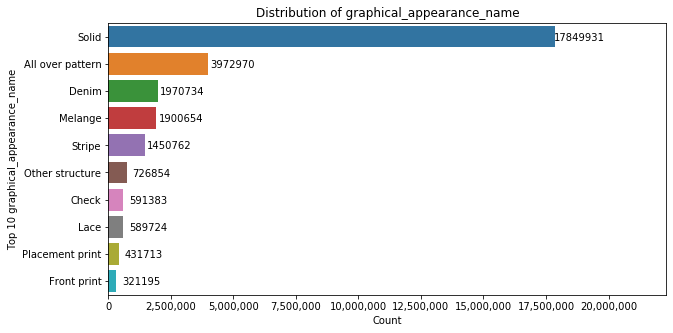

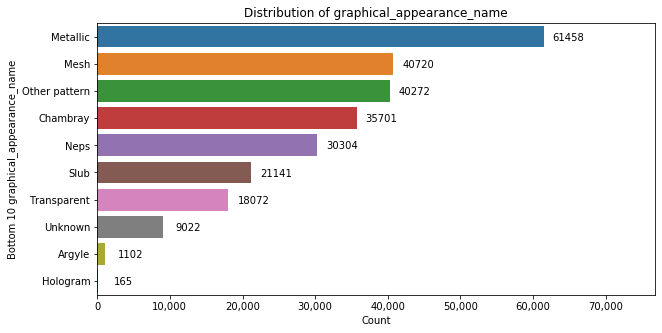

-------------
Variable: colour_group_name


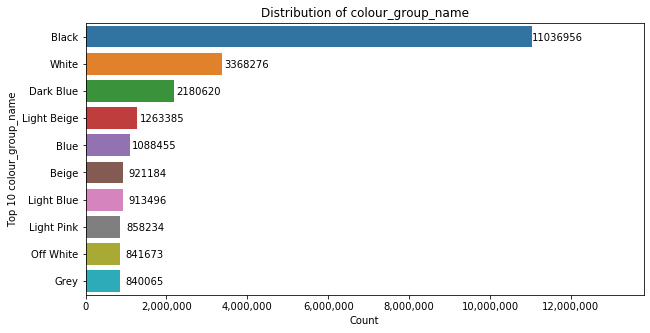

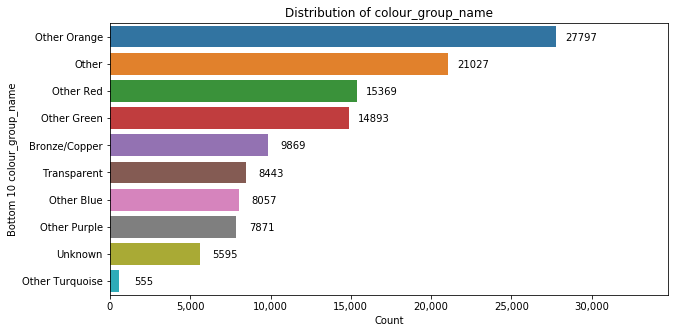

-------------
Variable: perceived_colour_value_name


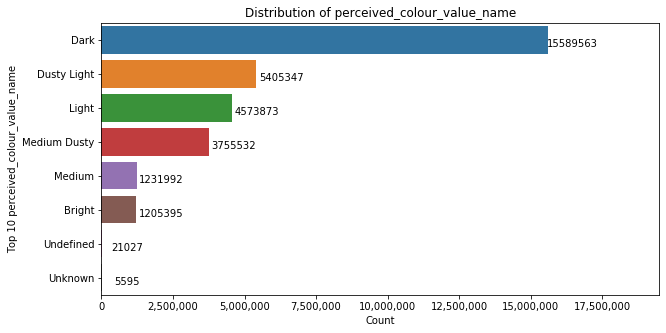

-------------
Variable: perceived_colour_master_name


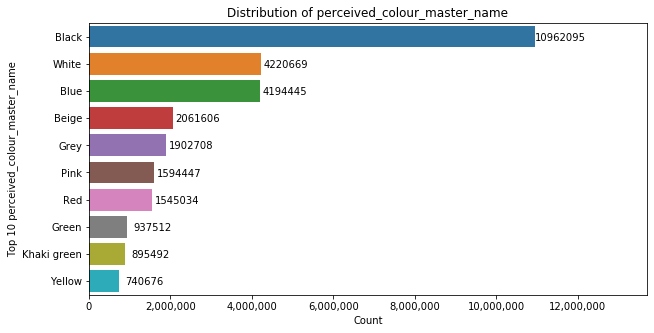

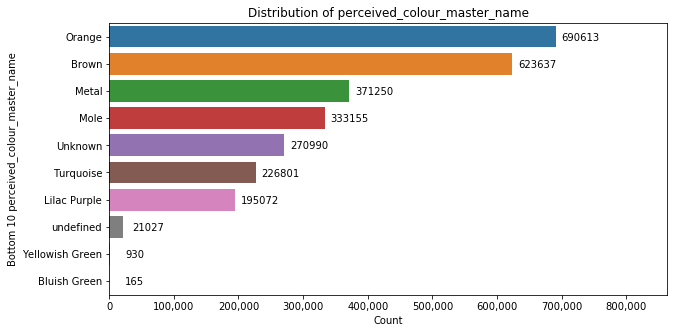

-------------
Variable: department_name


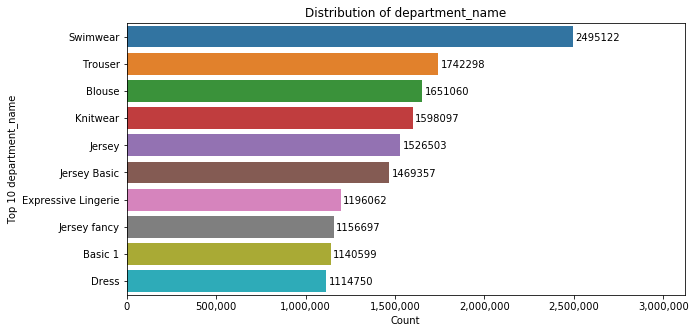

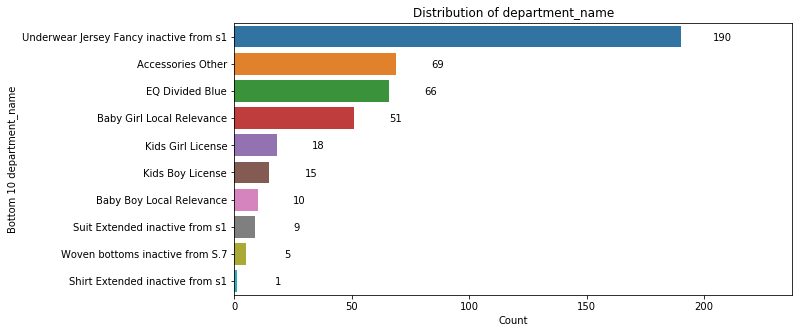

-------------
Variable: index_name


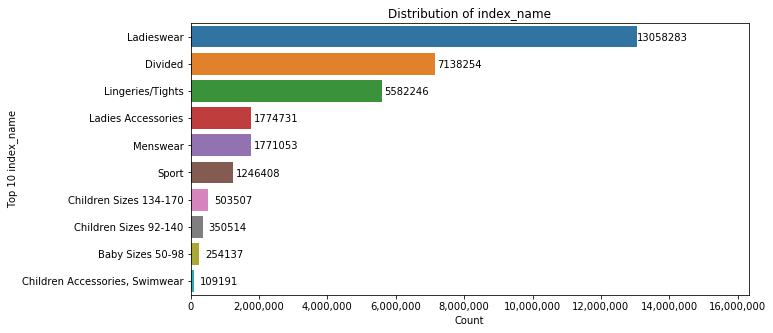

-------------
Variable: index_group_name


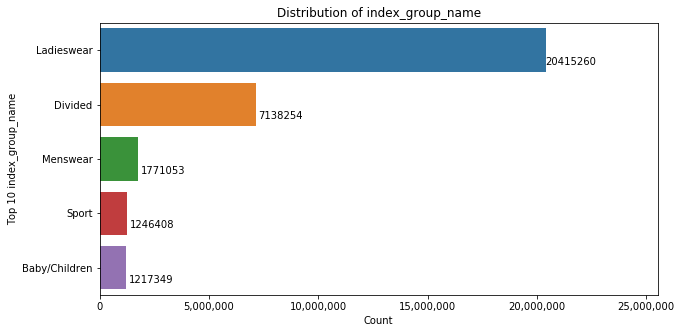

-------------
Variable: section_name


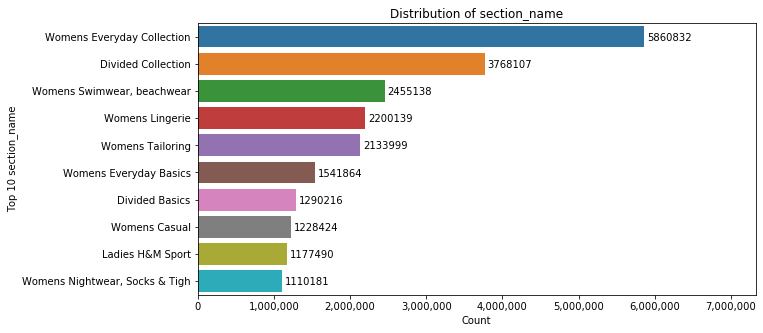

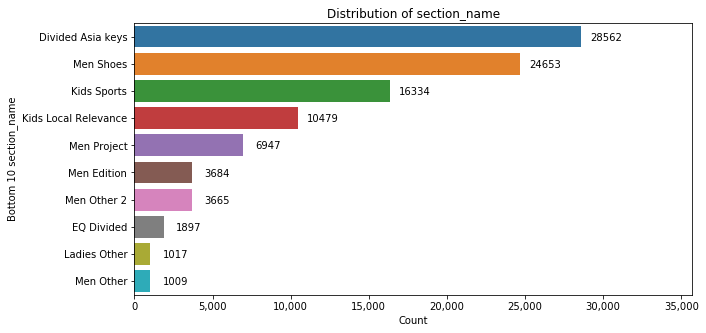

-------------
Variable: garment_group_name


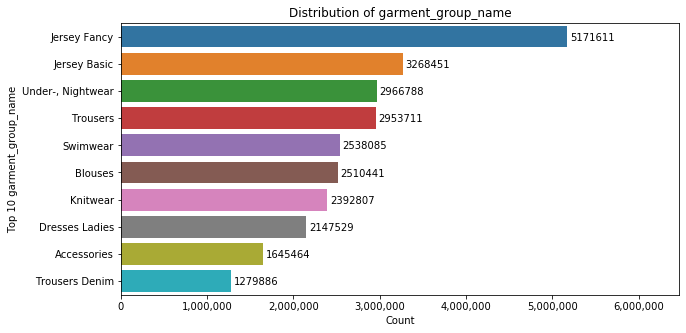

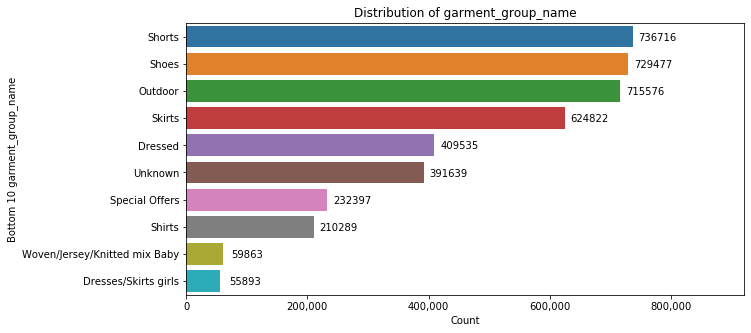

-------------
Variable: club_member_status


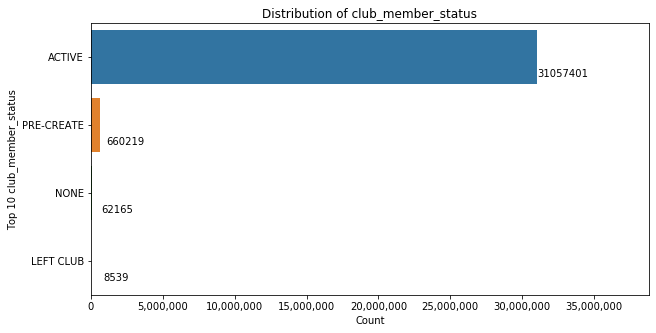

-------------
Variable: fashion_news_frequency


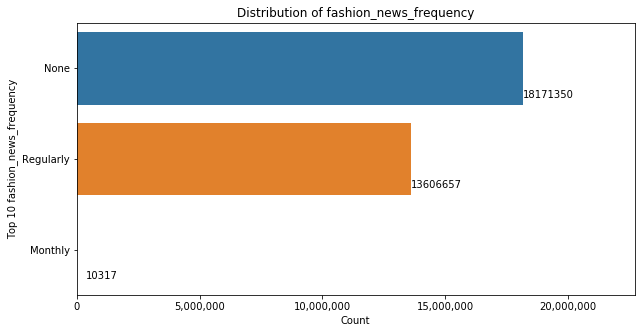

-------------
Variable: postal_code


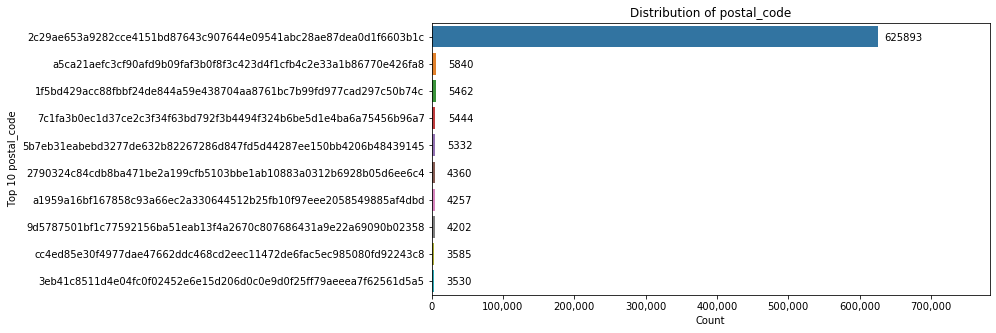

-------------


In [15]:
# Get Top 10 and Bottom 10 of all categorical variables
# - prod_name and postal_code have only count 1 for items in the bottom 10
for var in cat_var:
    print('Variable:', var)
    if (len(list(df[var].unique())) <= 10) or var in ['prod_name', 'postal_code']:
        countplot(df, var, [], 'top 10', horizontal=True)
    else: # len(list(df[var].unique())) > 10 > variables with more than 10 types
        for rank in ['top 10', 'bottom 10']:
            countplot(df, var, [], rank, horizontal=True)
    print('-------------')

In [16]:
def bottom_cats(var):
    total_count = 0
    for count, index_name in zip(list(df[var].value_counts()), list(df[var].value_counts().index)):
        total_count += 1
        if count == 1:
            print(index_name, count)
    print('Total number of records with count 1:',total_count)

In [17]:
# Check types for 'prod_name' and 'postal_code' with count 1
for var in ['prod_name', 'postal_code']:
    print('Variable:', var)
    bottom_cats(var)
    print('-------------\n')

Variable: prod_name
2 PK V-N SS SLIM FIT 1
Flirty Linda earring 1
CHINESE L/S 1
Katie boot SG 1
KIEHL Lacercut Bikini 1
CSP TINA fluffy coat 1
Monty hood 1
LEAF hairband 1
CSP TD Flame shirt 1
CSP SPEED Jon Utility 1
NEWBORN Fenix 2-p romper 1
CILLA Swimsuit 1
Michelle double layer-S 1
CNY SHANE HOOD 1
Philly J SPEED 1
Bracelet Ross 1
Nancy Top 1
Flirty Kalisi hair jewellery 1
FUNC. SB Mountain waterpr pant 1
Shorts SS 1
CSP Jasmine LS 1
FIRE printed tee 1
Fashion offer Surprise 1
CNY SPAIN 1
Monty Sporty socks 1
Morello Push Melbourne 1
CSP W Carol 1
Nellika romper 1
FUNC. SB Sebastian waterpr jkt 1
Just SS Denim Shirt 1
kourtny shorts 1
CSP Shoreditch tee hood 1
New Sigge 1
Csp lavender 1
Shayne Slipper 1
COLLAB W.CHEN JOGGER 1
Scarf Sam 1
Michael midtop sneaker SB 1
Xander shorts 1
Kirbie straight trs 1
Pollock cap 1
Foxy singer 1
Missy sequin tee dress 1
Nala party top 1
NICE jacket 1
new 3 pcs set 1
FUNC. SB Ant waterproof  pants 1
FAMILY 1 SB S/S t-shirt 1
2p Koko pins 1
SPEED sh

PQ Envelope laptop case 1
BETH MESH GLITTER STAR TEE 1
Anna waterproof boot BG 1
Lip balm multipack set 1
Harlem Leggings 1
Harmony shorts 1
Trixie body 1
BERT set 1
J Ginger EQ 1
Harriet Cargo Pants 1
PABLO 5-panel cap 1
MARNI long hood 1
SB Mason Insulation jkt 1
Isak scuba trucker 1
Isak parka V5 1
SB Hunter padded soft shell 1
PAUL V-NECk 1
Ariel SL set Flanell 1
MAGGIE 2p denim 1
ES DRAGONFLY dress 1
SB Cape Own fancy 1
Arista Brazilian Acacia Low 1
Tonya sweater 1
BB TRILLBY HAT 1
Lois PJ 1
PLUS 40 den 2p tights 1
SB Cape Own Fancy 1
Heartbeat 1
Heartbreaker high waist 1
Inspector leather jacket 1
Clare red 1
Clara pants 1
Hazel Embellished Dress 1
PLUI rainboot SG 1
Hector 1
BB SNOOD JERSEY 1
PIPPI rhinestone belt 1
Tonga Tregging 1
Ted sockrunner SG 1
ELIZA shorts DENIM 1
BB SCARF PREMIUM 1
BB SBC OWN NEW SPORTY FIT 1
PIPER CROSS BACK BIKINI 1
PAY TEE OL unique 1
Tommy fleece hoodie w ears 1
Tee Martin 1
ELLA Beanie 1
Ariel Necklace 1
Logg Long Johns BB 2-p 1
April Blazer 1
MAL

6b15f05304a953ebd5c0ddee52fb6ea2e6f9aae5662e7e0af46fc576cb80ad2e 1
fce9749afa15ff23ff64ea2498b832d3cd0a7bbf46d590abff730900bf38cd90 1
fdf6fab3134e23f49f297cca5031edc24803b9943d6aac169162dde2c6be7608 1
b8dac550fd7fa3d0c413efdeb6825c135c3e8b46537954dae0f7140acff32233 1
bf832236a57c7c735658ab0748cb9ae78f2743f8f013de1439fca5ca75ec7172 1
dc1cac520f22c4ed7ba8ee9786318c15a87343a3f1e921a33ac0a0cd6b05dbbf 1
ffadf7b9b9f72e84429c5c4a498b8707bd50b67956309580f80b57de03b436ce 1
d6f2a2ff6a31a3eaf1a45d5435e1c88ce2d354f71d0966bc77936d944ad1e1e9 1
00ed63880839fbb821b147664a5418726562ed3f344d07d24a25425735acd4ef 1
6b2826692933671940589371d92ad1559f9b2afc0b0e72e2b690fa4f7a43c80a 1
011e53275fb061619d394d4c7a8476a44183f2c5762a0b6d66c78a1e497b7d50 1
bc26d0ab691cf996822c40273c1b08635996009df04126a9905a4cdcaaf66664 1
beb64a6869952d93b81c73a12cf73d854fb90a797f25d74b11280269486b6be5 1
835dba906cd28e285fbcfc7e0094f26ca760f715e99ad23175f3f3f7c685bb7b 1
d39cab735a862c7c3f4a2e5b5d39c75a07edab930913ff1193e17d4b1ad683

bc1b62f995133670d55455eb8b1854799cff0c16fb57fb1f133eda7b24013b24 1
fcccb46b3dd76a4b3f838105e019241ea37fbc7d6fbc51e66a3d4bf958c841d8 1
bf12a646cce1a8b760ccf09db7cdd10ae498119f9aedbe0b17f2cf0ecad89f54 1
ba1b417d49ae34e74a32846f45a64d980e4315a145dbc558f1e77f748edbbc9b 1
00b2bcc4dedac78a5d60bc706724f939d850c8f59ee1875f2dcb7b22d346b739 1
09294f0e56b95a6164a4d5004debac242ebc9f435d2fa8aaa69baac79b301868 1
6af94130c05af545f048d264c080661812e53dc5a729804bf463857dc5f66bb5 1
bc4802ba58569727bc5fe3feb76e200105ce5d9e3d057b451b8053aeac798d78 1
00b321ec40ba4db37ce4a974f9802fac4d60d16e4a0050afee49788696646dfd 1
d67ade5a2b0e9b8ac92a31d64d185a1c17130ffeb6b236f04739a4df4a0e97c4 1
bcbeacb8211b8f4652c1ecc6ac1b0a64f4ed3388808787115781b21fd0f49da2 1
6a72ed69e10efab8a074f86064a576803aacbc78168cd5f43c37f75021c73301 1
698de3d682c11725685f7442c4f5658fcdb6c3658b23162707912c61d855173d 1
0ad7339c2915edab4a6c1e2a39558908b47de4f829c2d9023afaf4c25bf3035a 1
fb86353d56b9f3e3580650b8936888bf4132551957df0c8d08a3a5644b22af

7a0e3a740c3ad25088783bdbcff1f50452735f1c3820775b951fd3248450efe1 1
ff8d49e1d695fa06d198cb54bb6842c5aad19a7ce9046c0fa008b47f9ac2db58 1
bea328e0a885013d457bbbd8c8144d0614d19a2d644b52703ebb709e957ec574 1
6b320f64a954cbd8c7ea799b32d315a06f7e165508fa74b74a323b94bfbc18ae 1
014411cb4f172d66e13c6a1c8f0d23e4ca2d40160d95251651d4760fb180ecdb 1
ff8eb6800445ecc0931d2d1eff8a0fda3c9693bd72727b6af626c00c755eb308 1
fe6a65f2019d01d3d4476f0357b0eb5382570e8342e2db94090f26c3c640fbc8 1
fde7613f7c9da0a5f5b9a8d4ceb31303feb6ce606fc5a9844db95529bc62727d 1
dcc784b1b3269682dbc5d01a003f4569ab930fecd5f875937075b0d45c9a9e62 1
c135fbaa80e42442e95bc73d05f3a6785b2e0e55e52c43cc186c9e418cf90421 1
04997defc792cad6f93747f12a68d8f1a2e9a41921d8815d534aa1dd71809535 1
ba6027407491ae62dfb7bcaa6a88f4385c7f7398ca20aaaa420a772d7f6dcb5e 1
01445493aa7f28f183b55f401ff7dd2a042f75aeb81e85482565bebc957a9b73 1
0d904c9fd34834c0b4ccd93f5b1ba0adc95ea48d21e2902eb2ff83d73c58794a 1
6b3325096e0358dda2490c9c459837fc0a00c2c5cf7901ef7b9bf5f75ebd70

514c1ac8031673e9a8a57e3eec955d3027b35b4798d48c9115040303fb5028e7 1
9fc23493504d5ac1ee77b8858b776cf9db7e7e87c8029af933ec27cb434dc3af 1
ca4ef7adad623301e96758de72164fdc0395dfa52813c1615ac68d74413ac5aa 1
ecb4f0efa96324af3830618d76adc0b68cde22cd71205e22649dffa0ae72fca5 1
ecb56f1a6e5784ec6eaccab6053f7fbfe9eba869b511106200658816842fc78e 1
5150e8350cc75e836c06c4f3d4aac2f7ede72a2c37166fb459d118d21d245e46 1
39107ad20f6c9e864750d2b908bc95df1f7152d8dda96edc241db4dea97edc92 1
38c1a8e8124fabd8df7cd9cf8dd05aeb17b67aad69e8b1a9538c149bd22b99cd 1
eccfea76fb736c57b38683ba73e7f213e5cd7c51e243f51f96a2102ec0065869 1
38ba81efa6805b2d39f9704763d9ffc756b942c66bcd95826a9c110428bde569 1
740b9fcc2dacf05bc85b269d9b408129282ccf926e73163e257c21d8e5a3ec8a 1
3864abe80c6aba78b8f10cf837fec1da491004b26b9c0ee9e7bfbd12ca08ccfe 1
a007f09e32309e5a60dfd3ac3846c9e7500f1422ca16fa58cec74ce4702abd1c 1
3862c6d7634aa278cf12e7d70e9180013bb96bada8ea97c07e0c4772d9cd0f29 1
a009bb61c5836fd7226992c795ad032f3a28fdc3776d470e8c8de20fac41a9

57a9676851440532ca333d5d1297fc7f2d759f2ab5e98a8234f46f5da3b01684 1
2c51338f04be9f233e77b6401423302a3f8d1ff4edd53ac7e8bb92c3c2ac5b7a 1
2c4e6b3059ebf6dfb0e1bca7aadc30e51ed9f1ed20cf218c60532c94909a45bf 1
f0eab8e659dbe25ac57cc30c30bf7e6b5b4845f569f38e72c7d97a6eed6dd819 1
8f60aa2e0783040ef408cd2dbb3c952790f06789592d8ec3f7759ee54ba0aa87 1
c7f1418a7997957bfdc492b4c0d35a39264d222c1cdcc4b9458e29c1a6e2fd1d 1
57b2c42e97e8ca1e60f498e7344c25435b587fa5b0aa80c46cbcb6da7ffbd938 1
2c3ff4d1ef2e71f0d4c4ad30cca83eaec9c6a0565b422669433da1bce9095a10 1
f0ef8574b70992288c688d9b91545c387b8749e9f9a7cf7e849f4e1dcb51cfdb 1
57b3118ecf4166cd212d1a21b29651cacc7ab7ac8c798e293fb4c89762794eee 1
a6d0d16152edf881adef3e28e7a0ca2e16448c8767608cb5a3abe43c2a6da2a7 1
a6d4310fd2b6a0b4ad4ce965b2318c47b52b37aa78ab526306fab4e4a137a3c7 1
a6d589adb03e22cd94019bc6392c0d78fde7757af75080adc2071c236820b4d4 1
2c2d7a369202ab8457e841ec94cdad1a13c71ff89c1fc6a4f5e480f51435a1a1 1
a6d5e76b9770110b458d220c956caef965f85a00aa74f1cb0cd31693d1de82

e9a77812de95b6a6f9a79e036bc0cb21232208046eff0df848a1e2106c5fdb8c 1
4cdfa65ba263f4a4afb2092f8085b30509de9add742fa917c8884d016f3de415 1
4ce13b5a603ca583a4e6d677490b5eb8d06a4dc91edf036ba4d34fc89b0119ef 1
e61045dde4580d4507b61d5d500d65faa2416048e02a0cb37f2a7563d22c5ddc 1
42503c43b2f6645da96b9ad8995bf37cbf5ff9b0bd8fd30b86b03540b8609cab 1
424ceac5b183bc776de766d712bc3a287d90a70ef0fa70688b4fd972334fea22 1
4249256d80fea8d6042e7fa165419aa930a582646fb58e3997a251721286c4ed 1
cdf673e91961972e28a8bb82bcb2a80d5f6f24aabfbddec3a0e225f75f839aac 1
cbf9aa32f6def50ef5224f1d8fa222386e5053ecb549074958a82163c1ee00fd 1
7182230228cdcfaf10330179571b856838177475a018e092cfc061bc4bdc8e69 1
9b1c92cb8e996e5ece830b285016c1cd500f7f319dd1f262eafa6d6de14b6035 1
9551056fc24efd252f76ded01842cfb320a0c3f5923d86b473ca49f692c722f0 1
cbf08098dc4b6e7004e21b1472db32dc448ea0218f46ede7bd77f526fcbbabed 1
d522b1d5bf55adb3ebf01ffb5beb998489ea7b0c78f245b0a981ebda322024d7 1
e9a96785ebb24d78fb9f57054e6f2603dcd88bfd73c7a478f91b9adea6c517

93f4863affaf654eba72ca690d3d8324020e4e9c98fa173b0bac35bc5e906161 1
9dd74f6ad647a03d8728f70149e017d09a544dd09ef7a3013588e481f2223ab8 1
712ca41fa7785f4db21bfa1cc912cf8fbe103d817c1dfd28cc8edfa6194c2ef2 1
7ff2b71c5d1ae196bbc2cdd98f64d7325225d42d677fb7f3d0b86d75a8fd0f37 1
3c382215fca35ae4fb326210906fb8c0b3d21b9bc1141fd8ed652691df587a92 1
3c33997ff700a996e36cfd068bc4b07d9defcee1d0a34f72e6a00dd3c032fa63 1
e559cc396731f95b867552e2e8083ed93285cf126d4089ca830daced429f5455 1
9e609aac760a1c9d7e332ef990f79ab82d217f758aa8483bdb87a5004b2caf0a 1
cea27e340d5c5e295c44336ea7d296cde3f4177f53669855e0d1a1d8b2ef12be 1
3aeeb217f96c1254fb63aed1d52c4d0bb20edf9870fed11ee7ea6f1b871e4b9c 1
507266d0c05cc1c9457ffbca66a204a2c665aa0cf7c10ebb45af66675afd9fc7 1
5073a68e0918b0705a923737d82a2304b33c29f62cbeb7a6985744ac9dee910c 1
73a5707d2d2a7a53b5527869a46772b18c3d53fdc2ee15c9286cda400d2fde96 1
3ae5ec7a126d4bd13ffe9c49ba60b6dfc16c97984b092e4b2b94c065c3eef057 1
ec15e02979d5f7347e0cca479bd268cc6fc1a7559e49b9a28960dba486995f

b175c489c66b402fd6fd7c376ee1b5b931e35b949aea0c6d7a304066d672b83f 1
18f0a1127390b3562777cacb294e967bf4a62b49c560d43c9ee7adbdcf3218c6 1
18d0634459ff00955601107fba56af093602d9b3952f964584bc90255c79a66d 1
f79fe620160246a8468431c5ae48e2c2ddc0df8f9e1fee38f88fdcb63bb31563 1
6149b056e773dece6925ef2e8f568a5ee6ab6c73eedffc4265c01d1278a4d5d3 1
18c79779dabecf3f241b1bb21c367d1be9bede1d281bd23a26f6963f67d65dd8 1
8a24677ec511576f37bcd27ee2d4f7effd7acf7f61627d00658cae50171bc012 1
18be8f1738184be92b61233fdcca4fe32db01acb8e471993e4974ed19e218b94 1
18babdeb8d84b961c304da877d7d4cc160403314a9a51c12fe6a627ba90b9377 1
18b995cdae9a7c80b88a41416a1948efd1c163cf17dec8870615f7739fce7046 1
dad42dba60a8b27ddb733b4c5e6cdeeca2a5946195312ba0869780744a7aee4d 1
18b228cb5cda1fafed2bae30c03fac340f91457e25074fabc9e873e05df2aba2 1
8a3666ec5f874a06c27dbaebaac349b5c5967a85c081d2a96fe86b5fb2c26b87 1
f7948d88a906b369bf4fbb107283244ee8395ac1d719110d17b4a1712f5d3986 1
6157af2a94b4f7c7c8ff9edfc8950762f85b32dbbd62745fda691764f6cc8d

87df84cd3519d4683504de750e7dd476fbd69397682babdf70246f49e333e4ec 1
10e8d6572e2dc0566237162c0be6f855920c367c0e4b74290124adf6ced7291c 1
6e86b4be0028e350faf658d1389802cccac6c2a6bd2845cc42e746e90f17b594 1
10e8474125d395536fcfbd6bfe86ed3df9da85674e8e0d0125fcea6acfbae4f4 1
10e6b6ac2784044e7a1f67e0e1f60e45be8e2e20a07be23a556be1d7f9ff6c52 1
d780c6bfc9da970335970be95f97c450b5c1f859c34146f2ea6e88cb0390a41e 1
110a1e7c5bc995787017a1cce3333910d74a5e1dfb407cf192252e3483c725cf 1
110cd35c2de1c925338e58bcf69ffb0005ee73a18ce0d91cb5f103f3f559062d 1
1148d69a463fd7d19c40f240bac06e28540566ff0fdd6737bbd2e93122f2661a 1
1131bf2294bf4ae2ca70b135df38fafad88584136f29248d3e88464f9f667e96 1
b5bb4779c133d92c6b1a969c42fa22abb1864c461c1b3fc092414e4f3a45ab25 1
1146797835a06a1c431211975b91fbdfd67bd4ed6b8190045d364d7d6bb95bb1 1
11430b5251b652cd04901ecaa1749f00e22780faf3f0251ecd656ef820d76078 1
64f16b6445e8bda26cd72e880a7b66c07d81d348a0d681425c3c066d46d789f7 1
fa13ceb5308c5161e220bc40a0bb28280babd33e5a90b04af5532c4a517884

5a53e65ab9920b4de6647b48786b28be4454f4f7734d48e38605a77ca92536b1 1
a98f84fec98e3976cf3d49b17ec3fa178bf4a924783416bb90451b5c26e1eabd 1
e1ae2a2280d91f1a02856b32806f1c8385b1ab486b5345e384e2c4b169b002c9 1
7e3f03a67e55c669fa0a07201cf73b9773d3bc3ab6b94ec0d0bb7a88e3f196b6 1
27099d27d625189c5a2ed9a4f0b774e8f030273d7e8f14b7574e35753d330e0e 1
8e06f4cd44bd7ea131ac513c0c5b8431441d78e883c1416f627e145b4140ef20 1
8e06a80fc905374e1426a84ac6f0b2e8dbe5435c48e3540d6ac86f40a4efa98a 1
27056c159840847997f05b4c1a57832f4620c409c425cc8b91483be172bbff70 1
270271766f95c270e9621fd37d48ff9c4d86282b1be4712d62a440fd19a0b6db 1
c7015437d47f8114ec4319513ac21454e354d0aabe221eef9f4d4eeeff507ec1 1
f2b3f38bc725066d9672309ea5db32fc88a9a5aebdd5d8d443ff914ef25509fb 1
26fee5ac4e8eeb16101e20131cf55f5cfb568adada44063f45e52db934604f6a 1
f2b47b5dd450df00a34082f78aca0fcb3dc4851d34f6952a83308de1d324e5fd 1
7662e6893b14c41a7d40c092aaecd16ec8792ade172a5c96a63416b7d1859880 1
d09b962b486cef877cdb17fbbbf79904090fdfc771b7a48773cca3670c666d

c57fdbb26a55bc5bb4507e53143d3a9471a1add1767c15319dab95d830e7bed6 1
ada64b830e67d7b259cf7f02d6bdfab7a7c90d7c22623d6ee4038d4c6924e0a8 1
7d927e2f21c9aad65d6e0768ac3d0eccbb3e9618e74fbd339bb50304753c7c09 1
772d505aab90ade7f184d57273c9dc1105d027d8ee80f150c29cce82822e9021 1
c57418c56e078c25d3b3ce2e6e7b3762ffbb71bf6fd37cfd852987a9131c9948 1
1fee21dc4d8495a3149b4eb5fd7fb57f54ff8d5ed7f93afdae6030db08b02e77 1
adcd246dd1222e90e158f38791edccd0c9e56340edd366336ee41b511c11021c 1
add1c14e6d32d2c7f4602f1094200a3cff4507c89675e884c783b55e56f5f93c 1
8bfb8de5aa074a8ad7f9d3ef1a868d715eb20b53b32ac4b56ba1a5c0ae201dcc 1
f54323c17f7398d7adf0d8cbe4c9052e294f236446a2e46f664db07d5a43f293 1
772c20d568500cca22220f6a6dd0cd954013e81b553911dd41aca605a9bc9cbd 1
add9b4daacbe6d438c64daf9ad60aca0a7d951c51e789e414e5b4be734bfd2e3 1
1fd01a9ca635a2b469376129b88cced32305ce0832f0a801864f00d37ebfd17d 1
adde05af6a224233b037f5028721c8bc0a177a31711d8e047df8b1cacf90cdee 1
1fc2c61a8ac52665d3adb2656390d87b9a970391a15b3d199bdcbcd675a358

e120f25f626c066a396b797d435e705d123e1edbb68cc6a630b7d01e9704a9b3 1
aba41fad8bfb8950a77156292621add217d57e69c290e5a503de8ccb63ed03ec 1
f3eaa5099c03a35f3a7a7922613fce22ef6b82739652376837cd2f5448a7583a 1
6fbdda718e6f5ce6bcd111a64d61fbe9a65c13ca943537150c9ca5e93c186165 1
239db303e5168ccde5e5e4d7fcdb02a23420318a83fbf7bf025e2b3b84427eb6 1
c644606ff72bfb07cadd61152f4f4392dc06312cb58c074b2ac1754535285a38 1
abae8ea613fa6b865a3f6bd2add610ae20c7e5308d156e189808cf120e553a30 1
aba63b89679e5ae5a1ffdff1c56ed3365a9e881438c00da3eef6df1f99331cce 1
2399b6705af8c04c410957b1a9154f41a3b67b58854eeff30892074a1948c023 1
d0d30906e417e6bbf2e02d294bdd644edecc892ccba7ca59a534a3154c80f8dc 1
c6425c0b26ffe1bb0fc258337bc58097652a743b737b73327a37d95807197dc1 1
2393daac1379d80f63e2949e6e8da88d35963f7ae3919d9a449a33a365461555 1
d8495daa63d5397b0b168fb2d24d886c1d741b326075e58d93987277df24c655 1
5be25d0ed0bd401557f19f14ee6b500aa0e7b3ee7ad22bcca9eede6764517997 1
8d26952dd97d95fb677ca269ad1de63ef5642204f8fff55a2edf2267ef7f9b

### 2.4.2 Distribution of Continuous Variables
- [price, age]

In [18]:
def hist_boxplot(df, var_col):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    df.hist(column=[var_col], bins=10, ax=axes[0])
    axes[0].set_title(f'Distribution of {var_col} using Histogram')
    axes[0].get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    df.boxplot(column=[var_col], return_type='axes', ax=axes[1])
    axes[1].set_title(f'Distribution of {var_col} using Boxplot')

    plt.show()

In [19]:
df['price'].value_counts().iloc[:10]

0.016932    3416921
0.033881    3406538
0.025407    3266926
0.013542    1497769
0.050831    1494130
0.042356    1485660
0.022017    1287249
0.030492    1221011
0.008458    1074468
0.015237     705244
Name: price, dtype: int64

In [20]:
df['price'].value_counts().iloc[:10].index

Float64Index([0.0169322033898305, 0.0338813559322033, 0.0254067796610169,
              0.0135423728813559, 0.0508305084745762, 0.0423559322033898,
              0.0220169491525423, 0.0304915254237288,  0.008457627118644,
              0.0152372881355932],
             dtype='float64')

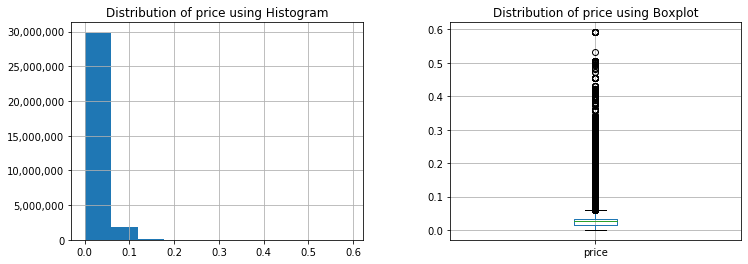

In [21]:
hist_boxplot(df, 'price')

In [22]:
df['price'].describe()

count    3.178832e+07
mean     2.782927e-02
std      1.918113e-02
min      1.694915e-05
25%      1.581356e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.915254e-01
Name: price, dtype: float64

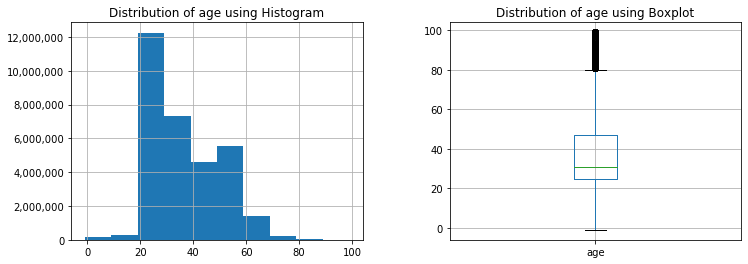

In [23]:
hist_boxplot(df, 'age')

In [24]:
df['age'].describe()

count    3.178832e+07
mean     3.587485e+01
std      1.318195e+01
min     -1.000000e+00
25%      2.500000e+01
50%      3.100000e+01
75%      4.700000e+01
max      9.900000e+01
Name: age, dtype: float64

### 2.4.3 Distribution of Date Variables
- [t_dat]
- Obtain the number of transactions over the years to see if there are any seasonal trends

In [25]:
def barplot(df, var_col, title=None):
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x=var_col, y='Counts', data=df)
    for p in ax.patches:
        ax.annotate(p.get_height()/1000000, 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

    max_height = max([x.get_height() for x in ax.patches])    
    plt.ylim(0, max_height*1.25)
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x)/1000000, ',')))

    if title:
        ax.set_title(title)
    else:
        ax.set_title(f'Distribution for {var_col}')

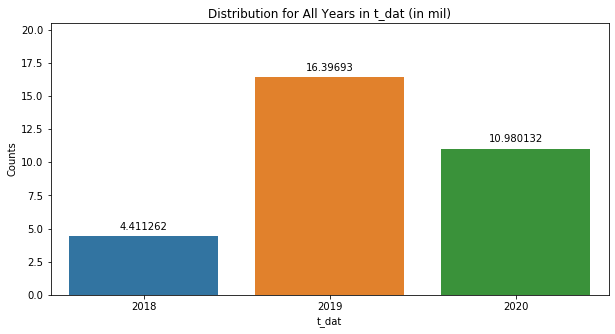

In [26]:
# Distribution for all years
df_grouped = df['t_dat'].groupby(df['t_dat'].dt.year).size().reset_index(name='Counts')
barplot(df_grouped, 't_dat', 'Distribution for All Years in t_dat (in mil)')

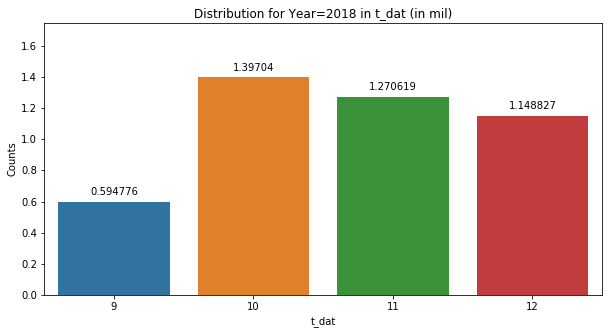

In [27]:
# Distribution within year (Year = 2018)
tdat_2018 = df[df['t_dat'].dt.year == 2018]
df_grouped = tdat_2018['t_dat'].groupby(tdat_2018['t_dat'].dt.month).size().reset_index(name='Counts')
barplot(df_grouped, 't_dat', 'Distribution for Year=2018 in t_dat (in mil)')

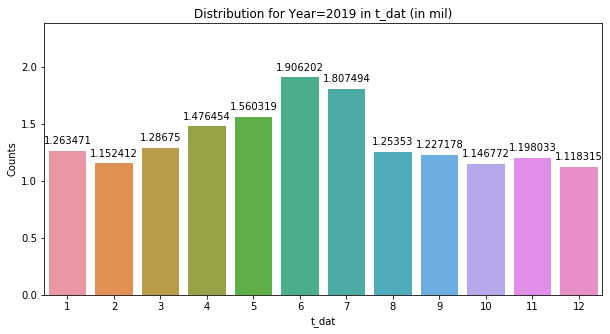

In [28]:
# Distribution within year (Year = 2019)
tdat_2019 = df[df['t_dat'].dt.year == 2019]
df_grouped = tdat_2019['t_dat'].groupby(tdat_2019['t_dat'].dt.month).size().reset_index(name='Counts')
barplot(df_grouped, 't_dat', 'Distribution for Year=2019 in t_dat (in mil)')

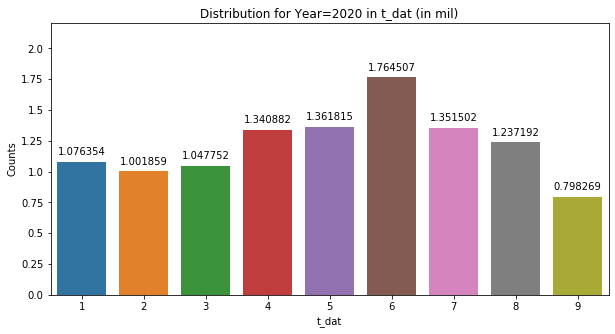

In [29]:
# Distribution within year (Year = 2020)
tdat_2020 = df[df['t_dat'].dt.year == 2020]
df_grouped = tdat_2020['t_dat'].groupby(tdat_2020['t_dat'].dt.month).size().reset_index(name='Counts')
barplot(df_grouped, 't_dat', 'Distribution for Year=2020 in t_dat (in mil)')

## 2.5 Relationship between Categorical Variables
Use the broadest category of each section: (otherwise too many)
- product_group_name, graphical_appearance_name, perceived_colour_master_name, index_group_name, garment_group_name, club_member_status, fashion_news_frequency
- Compare club_member_status vs the rest, and
- Compare fashion_news_frequency vs the rest

In [30]:
def cross_tab(df, indep_col, dep_cols):
    for dep_col in dep_cols:
        ct = pd.crosstab(df[indep_col], df[dep_col], normalize='index')
        print(ct)

In [31]:
df.loc[:,cat_var].head()

,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,club_member_status,fashion_news_frequency,postal_code
0,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",ACTIVE,None,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",ACTIVE,None,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,Rae Push (Melbourne) 2p,Bra,Underwear,Solid,Light Pink,Dusty Light,Pink,Casual Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",ACTIVE,None,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,Pluto OTS,Blouse,Garment Upper body,Stripe,Light Blue,Light,Blue,Blouse,Ladieswear,Ladieswear,Womens Casual,Blouses,ACTIVE,None,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
4,Lazer Razer Brief,Swimwear bottom,Swimwear,Solid,Black,Dark,Black,Swimwear,Lingeries/Tights,Ladieswear,"Womens Swimwear, beachwear",Swimwear,ACTIVE,None,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [32]:
# Find unique items in broad categories
broad_cat = ['product_group_name', 'graphical_appearance_name',\
             'perceived_colour_master_name', 'index_group_name', \
             'garment_group_name', 'club_member_status', \
             'fashion_news_frequency']

for var in broad_cat:
    print('Variable:',var)
    print('Number of unique variables:',len(list(df[var].unique())))
    print(list(df[var].unique()))
    print('-------------')

Variable: product_group_name
Number of unique variables: 19
['Underwear', 'Garment Upper body', 'Swimwear', 'Garment Lower body', 'Socks & Tights', 'Accessories', 'Nightwear', 'Garment Full body', 'Shoes', 'Unknown', 'Items', 'Cosmetic', 'Bags', 'Garment and Shoe care', 'Stationery', 'Furniture', 'Underwear/nightwear', 'Interior textile', 'Fun']
-------------
Variable: graphical_appearance_name
Number of unique variables: 30
['Solid', 'Stripe', 'Melange', 'All over pattern', 'Other structure', 'Lace', 'Jacquard', 'Colour blocking', 'Unknown', 'Front print', 'Denim', 'Check', 'Embroidery', 'Neps', 'Dot', 'Contrast', 'Placement print', 'Application/3D', 'Glittering/Metallic', 'Treatment', 'Chambray', 'Metallic', 'Sequin', 'Mixed solid/pattern', 'Other pattern', 'Transparent', 'Mesh', 'Slub', 'Argyle', 'Hologram']
-------------
Variable: perceived_colour_master_name
Number of unique variables: 20
['Black', 'Pink', 'Blue', 'Grey', 'Beige', 'Khaki green', 'Red', 'White', 'Green', 'Orange', 

In [33]:
cross_tab(df, 'club_member_status', \
          ['product_group_name', 'graphical_appearance_name', \
           'perceived_colour_master_name','index_group_name', \
           'garment_group_name'])

product_group_name  Accessories      Bags  Cosmetic           Fun  Furniture  \
club_member_status                                                             
ACTIVE                 0.050645  0.000231  0.000046  1.609922e-07   0.000017   
LEFT CLUB              0.051060  0.001054  0.000000  0.000000e+00   0.000117   
NONE                   0.044993  0.000225  0.000129  0.000000e+00   0.000000   
PRE-CREATE             0.035520  0.000198  0.000086  0.000000e+00   0.000015   

product_group_name  Garment Full body  Garment Lower body  Garment Upper body  \
club_member_status                                                              
ACTIVE                       0.111993            0.221378            0.395213   
LEFT CLUB                    0.103174            0.217356            0.415154   
NONE                         0.107440            0.230580            0.407512   
PRE-CREATE                   0.101007            0.233900            0.378025   

product_group_name  Garment and 

In [34]:
cross_tab(df, 'fashion_news_frequency', \
          ['product_group_name', 'graphical_appearance_name', \
           'perceived_colour_master_name','index_group_name', \
           'garment_group_name'])

product_group_name      Accessories      Bags  Cosmetic           Fun  \
fashion_news_frequency                                                  
Monthly                    0.060967  0.000097  0.000000  0.000000e+00   
None                       0.049321  0.000226  0.000048  1.650951e-07   
Regularly                  0.051646  0.000236  0.000046  1.469869e-07   

product_group_name      Furniture  Garment Full body  Garment Lower body  \
fashion_news_frequency                                                     
Monthly                  0.000000           0.080353            0.211496   
None                     0.000017           0.107998            0.221942   
Regularly                0.000016           0.116793            0.221281   

product_group_name      Garment Upper body  Garment and Shoe care  \
fashion_news_frequency                                              
Monthly                           0.422313               0.000000   
None                              0.391094    

In [35]:
# Check for r/s btw club_member_status & fashion_news_frequency
cross_tab(df, 'club_member_status', ['fashion_news_frequency'])

fashion_news_frequency   Monthly      None  Regularly
club_member_status                                   
ACTIVE                  0.000322  0.563255   0.436423
LEFT CLUB               0.000000  0.991334   0.008666
NONE                    0.000241  0.921242   0.078517
PRE-CREATE              0.000454  0.927532   0.072014


## 2.6 Relationship of each variable with Price

In [36]:
df['price'] = pd.to_numeric(df.price, errors='coerce')

### 2.6.1 Relationship of categorical variables with Price using Average

Variable: prod_name


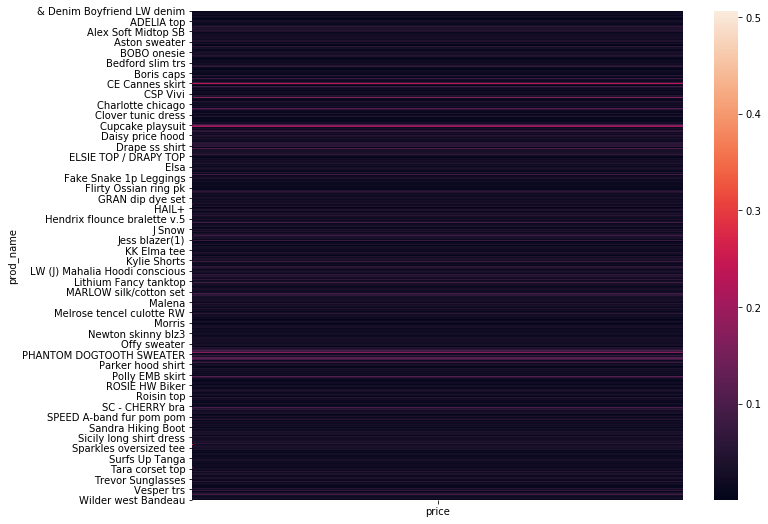

-------------

Variable: product_type_name


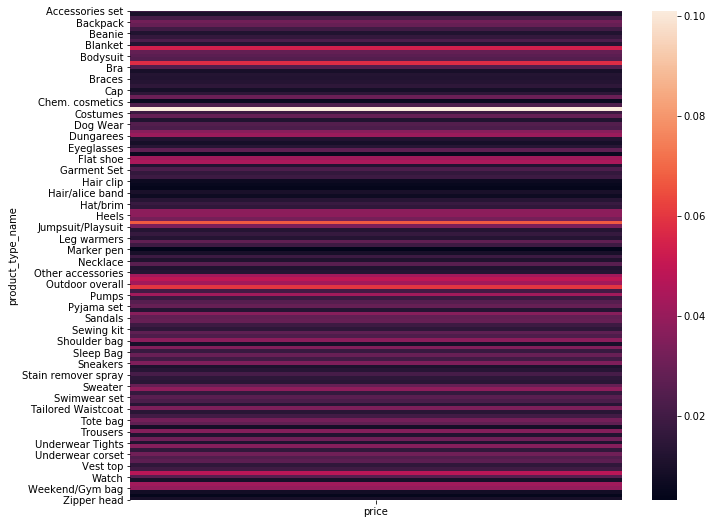

-------------

Variable: product_group_name


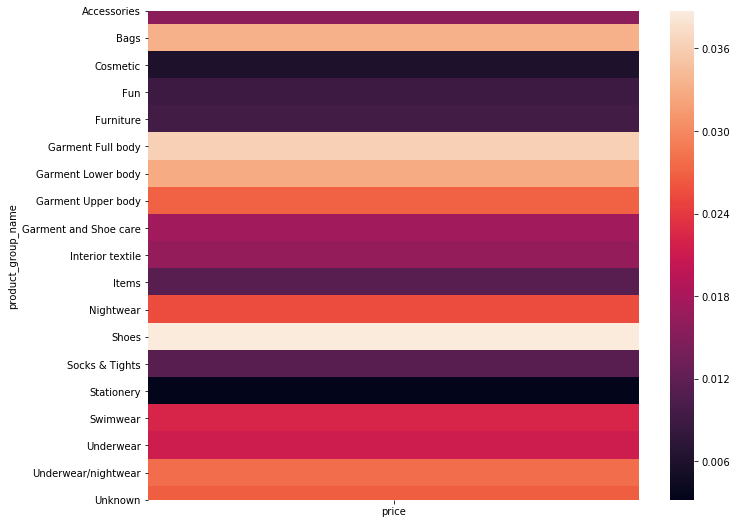

-------------

Variable: graphical_appearance_name


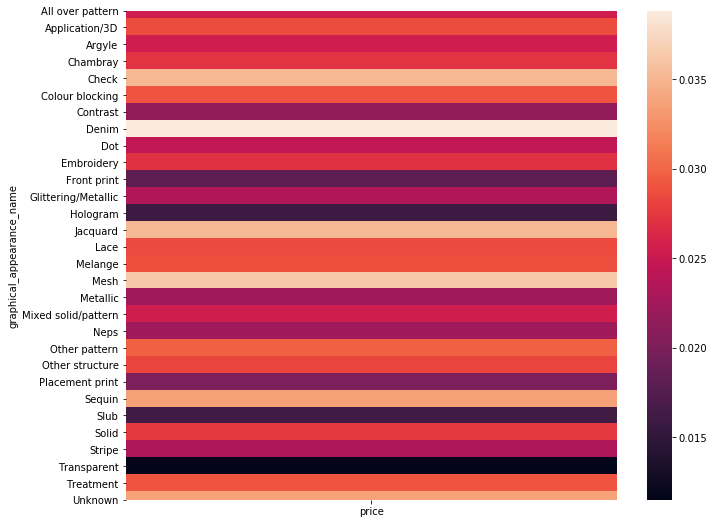

-------------

Variable: colour_group_name


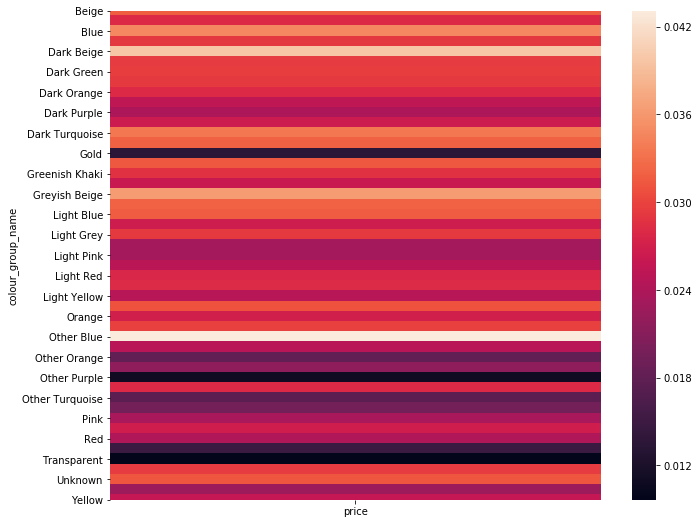

-------------

Variable: perceived_colour_value_name


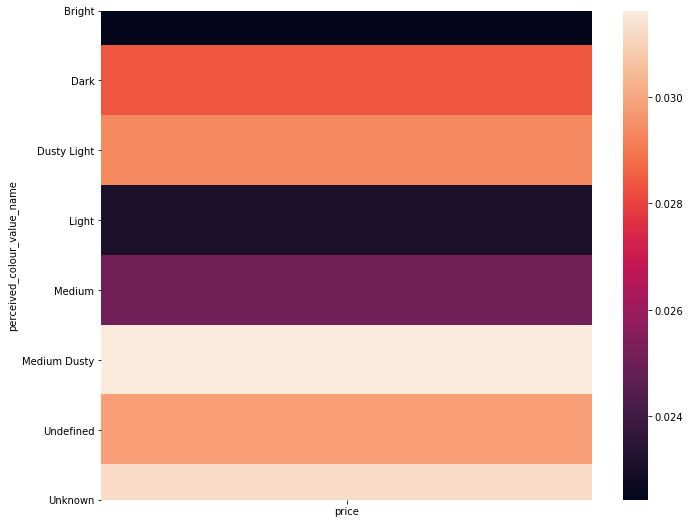

-------------

Variable: perceived_colour_master_name


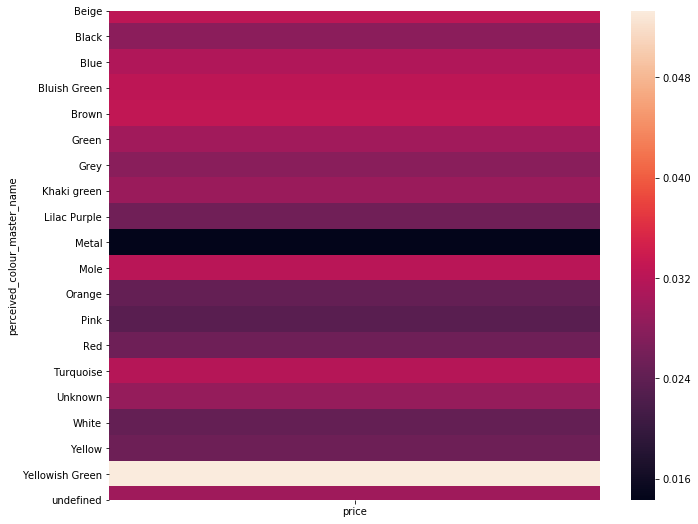

-------------

Variable: department_name


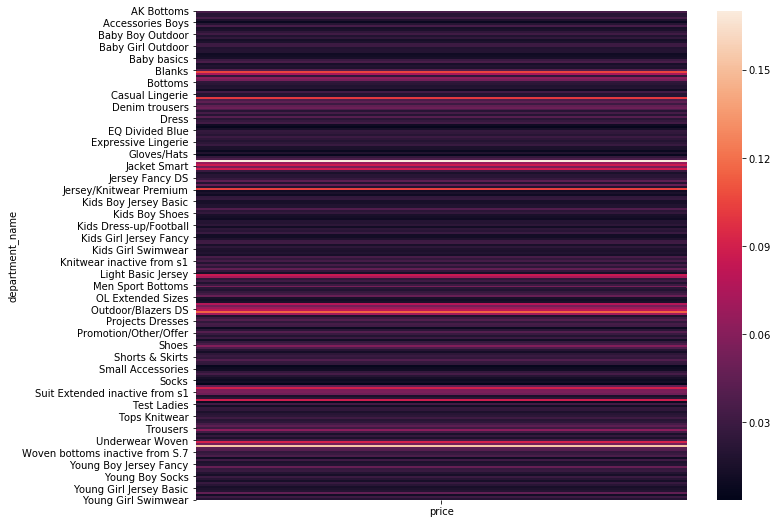

-------------

Variable: index_name


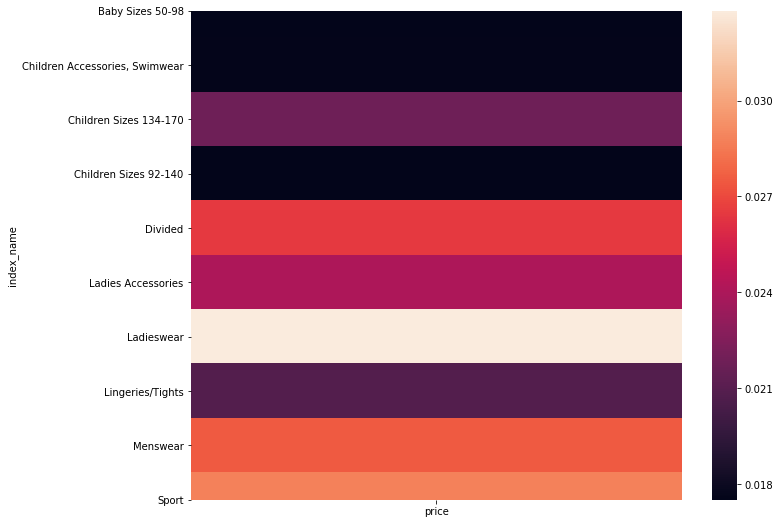

-------------

Variable: index_group_name


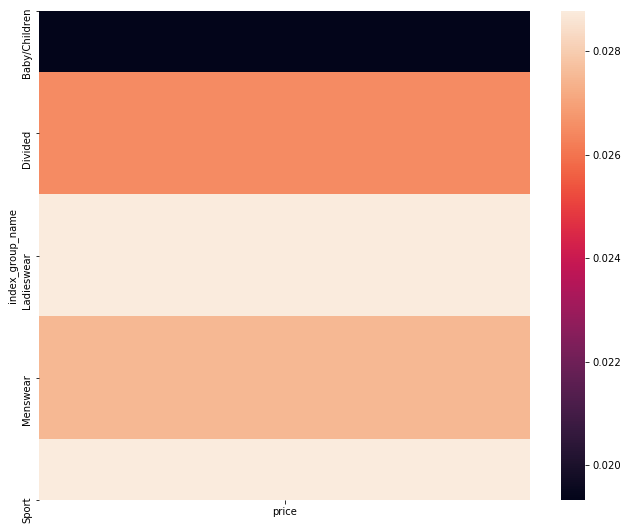

-------------

Variable: section_name


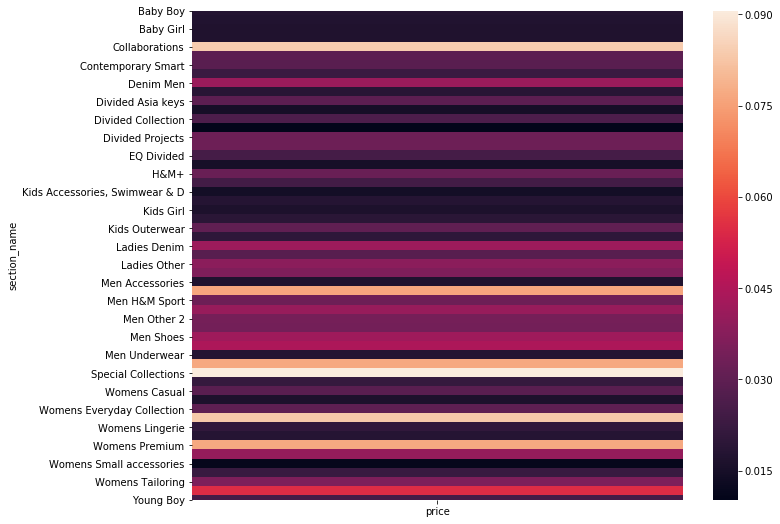

-------------

Variable: garment_group_name


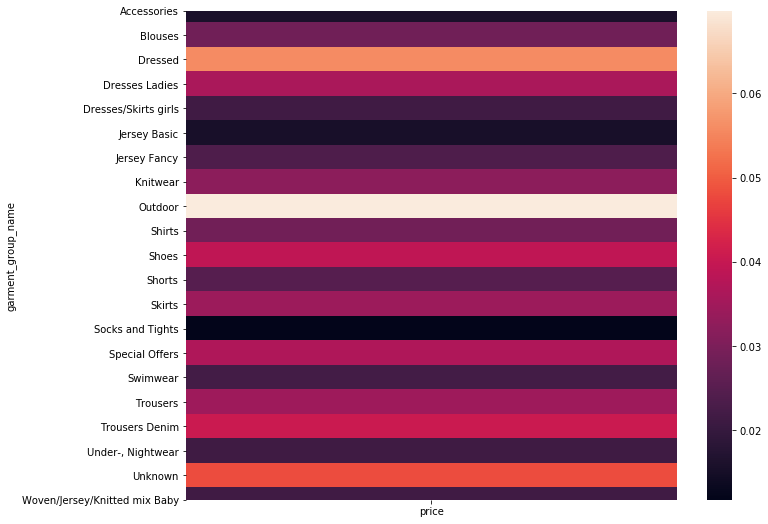

-------------

Variable: club_member_status


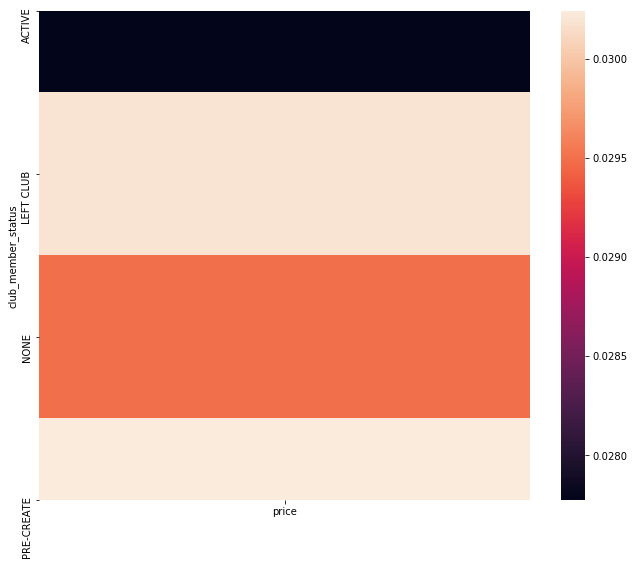

-------------

Variable: fashion_news_frequency


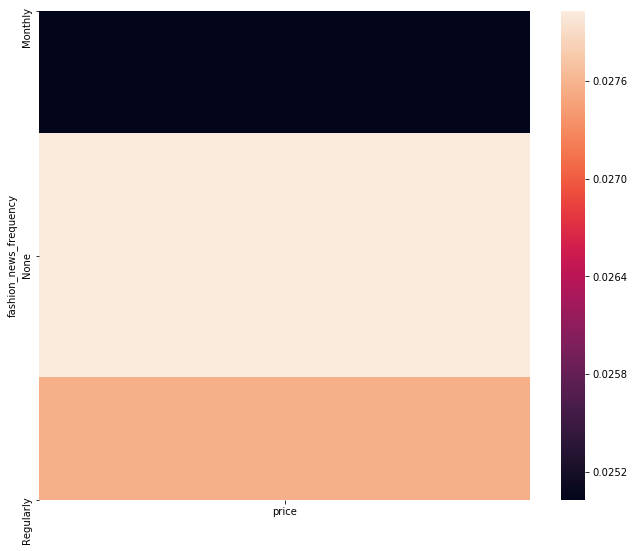

-------------

Variable: postal_code


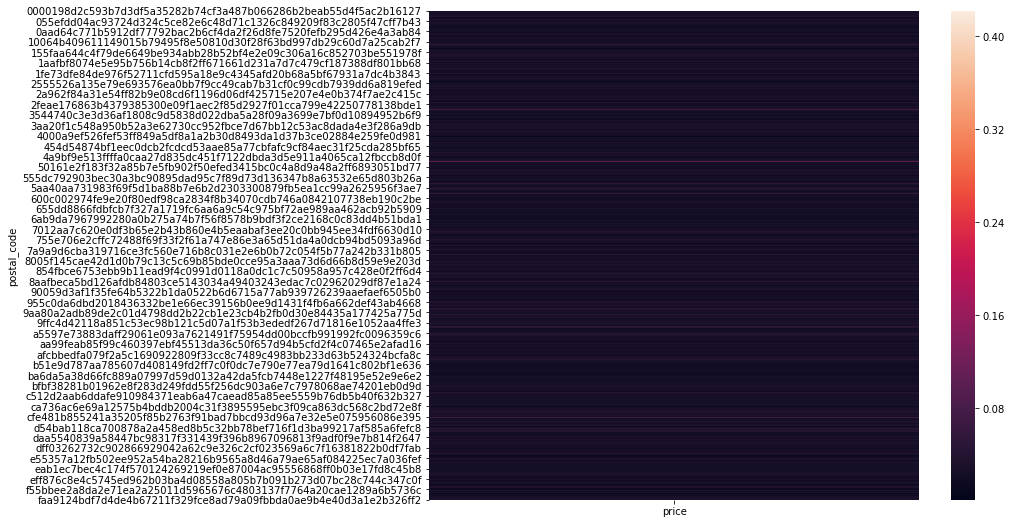

-------------



In [37]:
for var in cat_var:
    print('Variable:',var)
    
    # Subset relevant column with Price
    df_m = df.loc[:,[var,'price']]
    
    # Group by column and use average
    df_m = df_m.groupby([var]).mean()
    
    # Plot heatmap
    fig, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(df_m)
    plt.show()
    
    print('-------------\n')

### 2.6.2 Relationship of categorical variables with Price using Median

Variable: prod_name


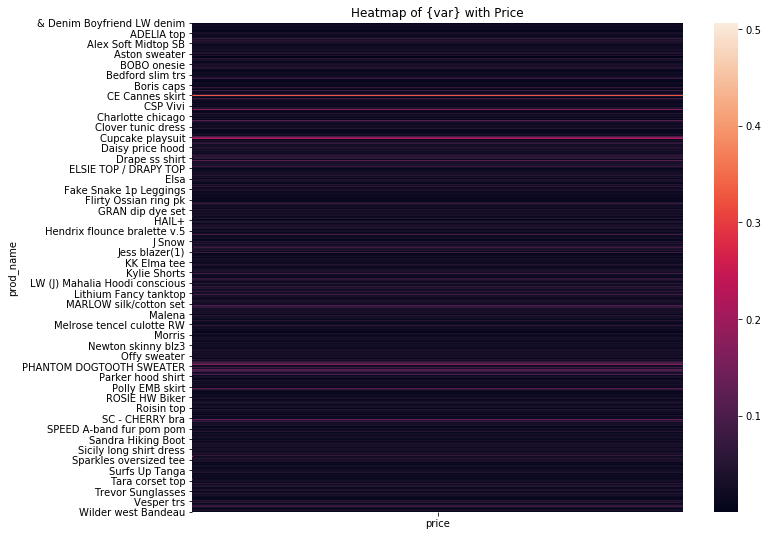

-------------

Variable: product_type_name


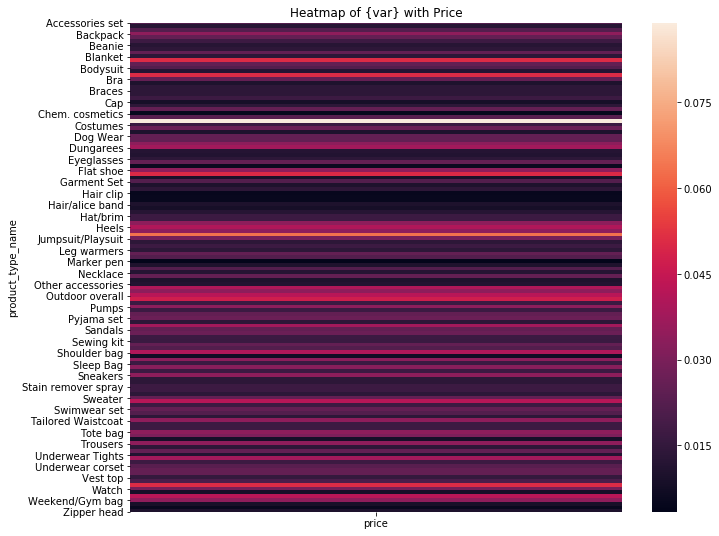

-------------

Variable: product_group_name


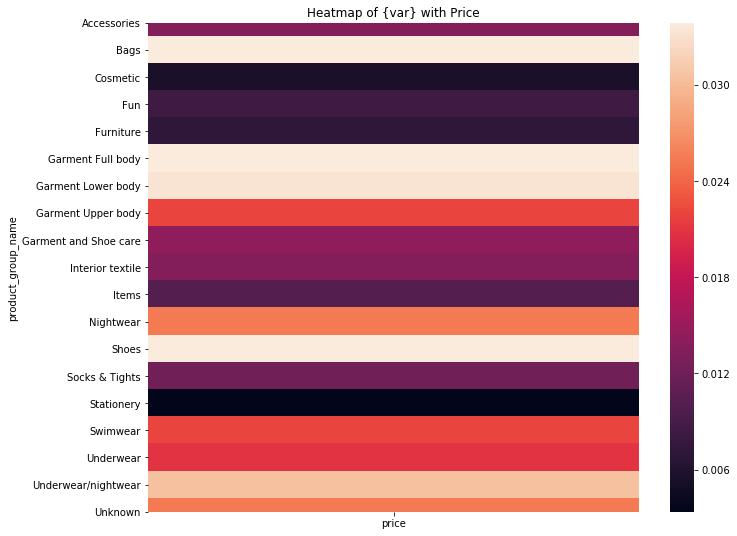

-------------

Variable: graphical_appearance_name


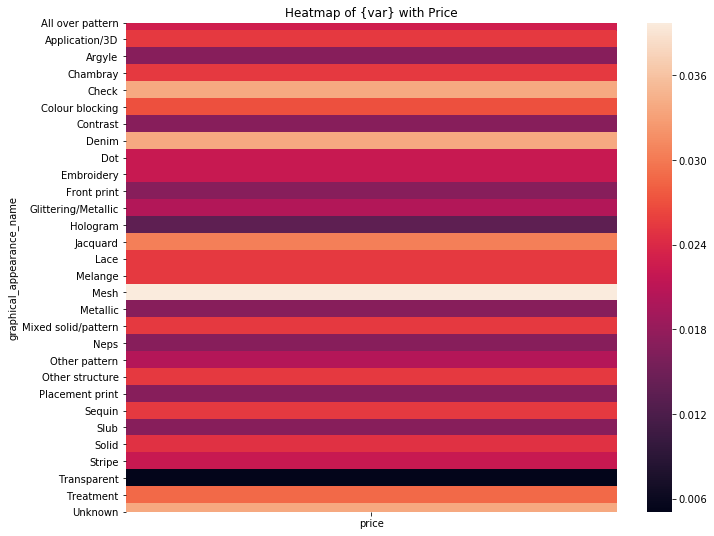

-------------

Variable: colour_group_name


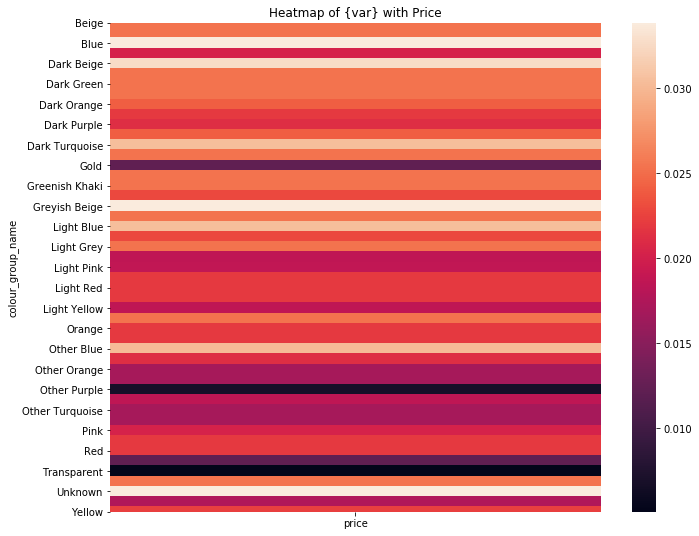

-------------

Variable: perceived_colour_value_name


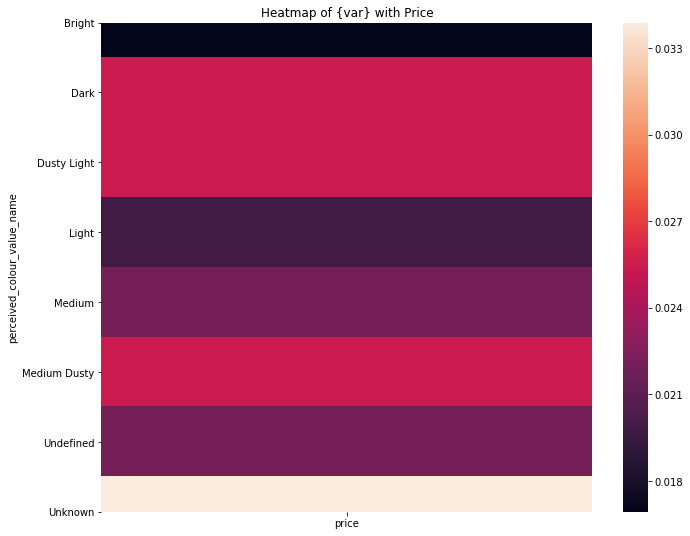

-------------

Variable: perceived_colour_master_name


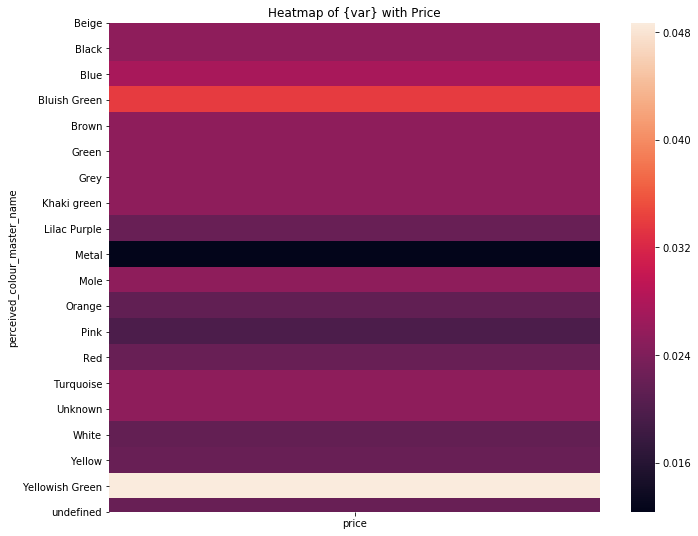

-------------

Variable: department_name


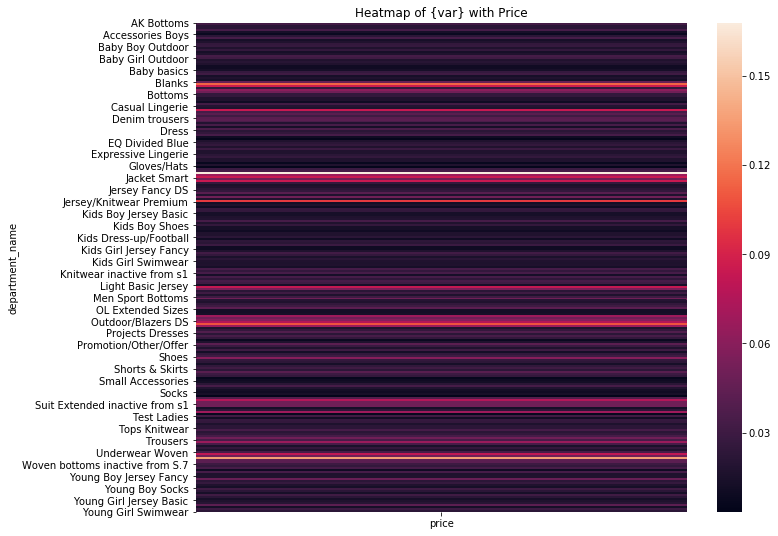

-------------

Variable: index_name


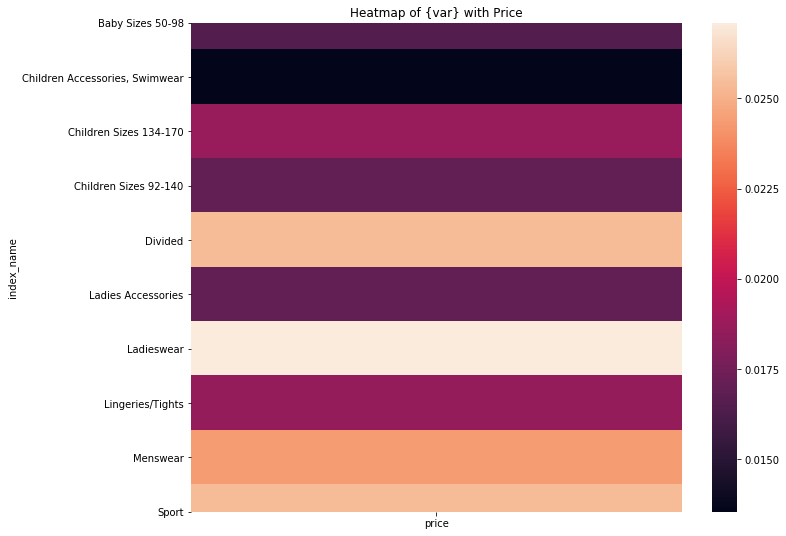

-------------

Variable: index_group_name


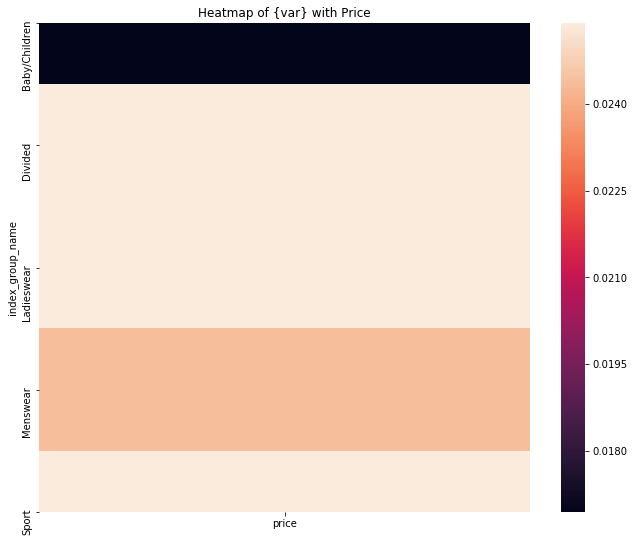

-------------

Variable: section_name


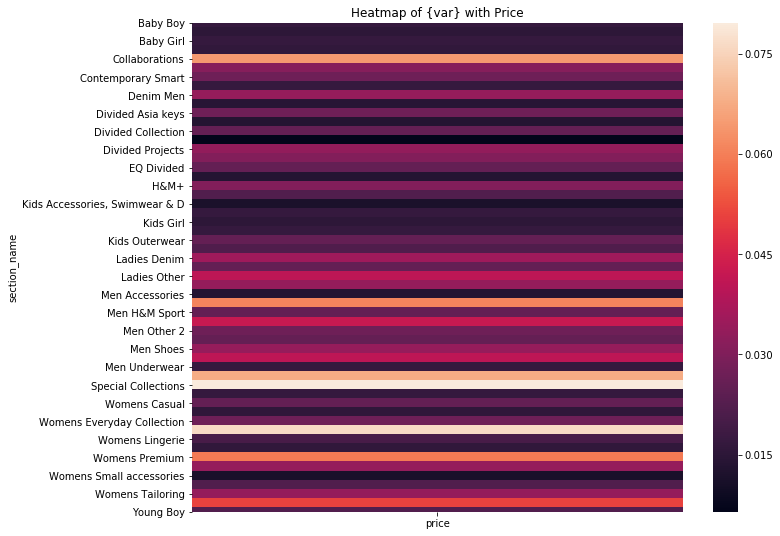

-------------

Variable: garment_group_name


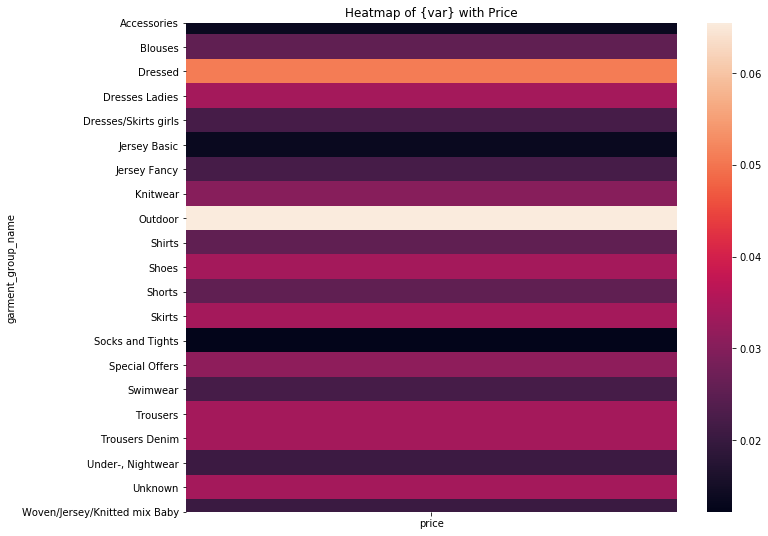

-------------

Variable: club_member_status


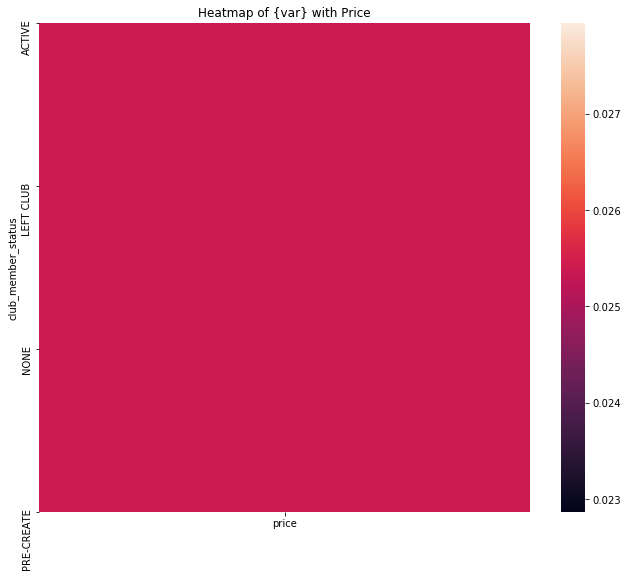

-------------

Variable: fashion_news_frequency


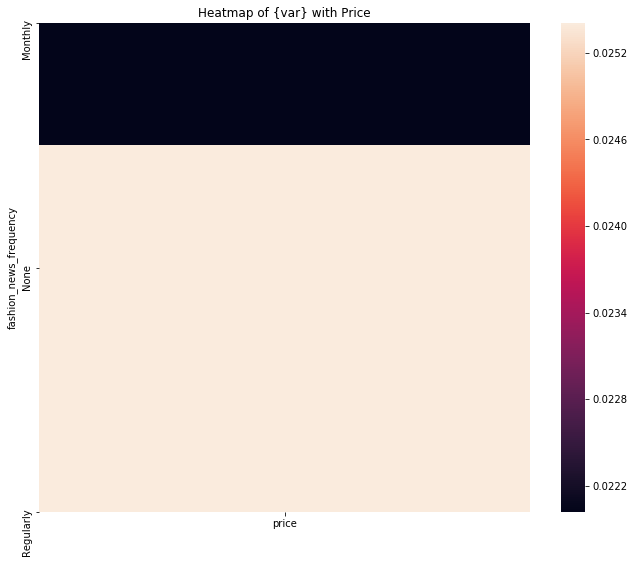

-------------

Variable: postal_code


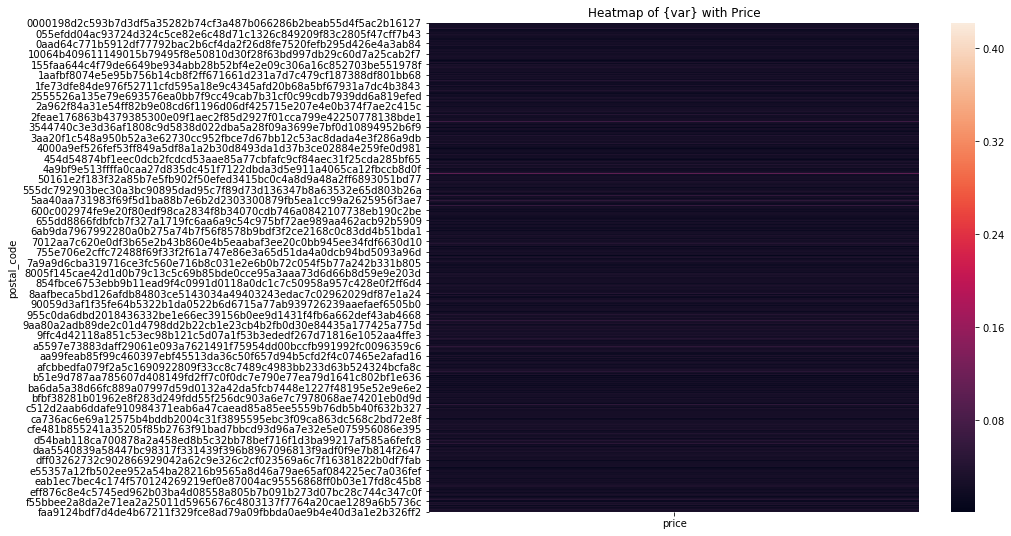

-------------



In [38]:
for var in cat_var:
    print('Variable:',var)
    
    # Subset relevant column with Price
    df_m = df.loc[:,[var,'price']]
    
    # Group by column and use average
    df_m = df_m.groupby([var]).median()
    
    # Plot heatmap
    fig, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(df_m)
    plt.title('Heatmap of {var} with Price', loc='center')
    plt.show()
    
    print('-------------\n')

### 2.6.3 Relationship of continuous variables with Price (just Age)

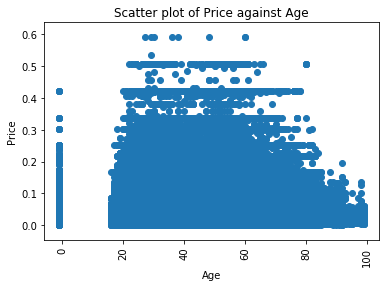

In [39]:
# By actual age
plt.scatter(df['age'], df['price'])
plt.ylabel("Price")
plt.xlabel('Age')
plt.xticks(rotation=90)
plt.title('Scatter plot of Price against Age')
plt.show()

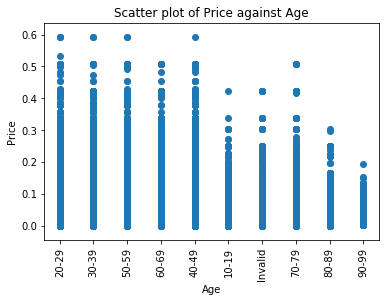

In [40]:
# By age range (in bins)
df_m = df.loc[:,['age','price']]

bins = [-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['Invalid','10-19', '20-29', '30-39', '40-49', '50-59', '60-69', \
          '70-79', '80-89', '90-99']
df_m['age_range'] = pd.cut(df_m.age,bins,labels = labels,include_lowest = True)

plt.scatter(df_m['age_range'], df_m['price'])
plt.ylabel("Price")
plt.xlabel('Age')
plt.xticks(rotation=90)
plt.title('Scatter plot of Price against Age')
plt.show()

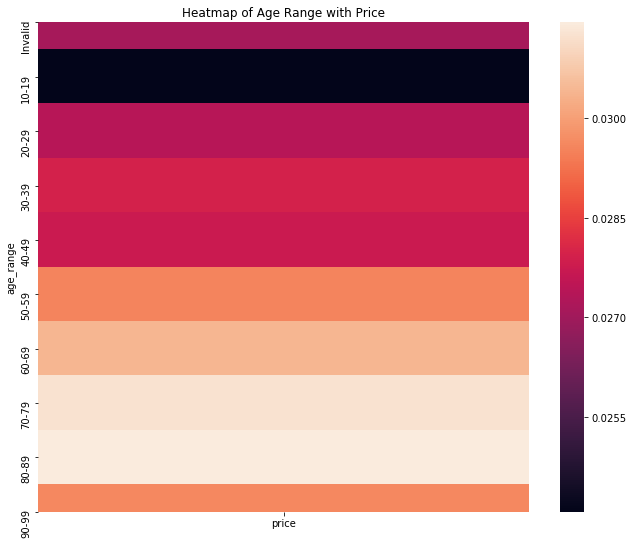

In [41]:
df_m = df_m.drop(columns=['age'])
df_m = df_m.groupby(['age_range']).mean()

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_m)
plt.title('Heatmap of Age Range with Price', loc='center')
plt.show()

### 2.6.4 Relationship of date variables with Price (just Transaction Date)

Using Average

In [42]:
# create a copy of the dataframe, and add columns for month and year
df_m = df.loc[:,['t_dat','price']]
df_m['month'] = [i.month for i in df_m['t_dat']]
df_m['year'] = [i.year for i in df_m['t_dat']]

# group by month and year, get the average
df_m = df_m.groupby(['month', 'year']).mean()
df_m.head()

price
month year          
1     2019  0.026475
      2020  0.026751
2     2019  0.027272
      2020  0.028739
3     2019  0.029181

In [43]:
df_m = df_m.unstack(level=0)
df_m.head()

price                                                              \
month        1         2         3         4         5         6         7    
year                                                                          
2018        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2019   0.026475  0.027272  0.029181  0.029005  0.027788  0.025521  0.022344   
2020   0.026751  0.028739  0.028894  0.028197  0.027277  0.024401  0.023946   

                                                         
month        8         9         10        11        12  
year                                                     
2018        NaN  0.029853  0.029766  0.030694  0.028318  
2019   0.024368  0.032843  0.032254  0.032432  0.027960  
2020   0.026779  0.033577       NaN       NaN       NaN

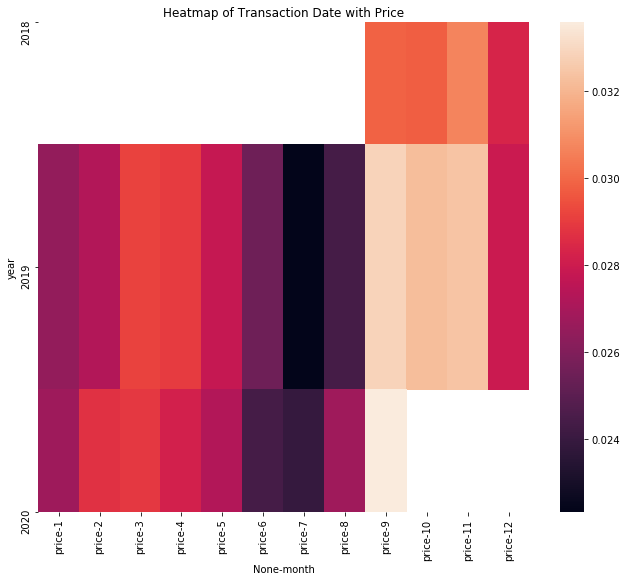

In [44]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_m)
plt.title('Heatmap of Transaction Date with Price', loc='center')
plt.show()

Using Median

In [45]:
# create a copy of the dataframe, and add columns for month and year
df_m = df.loc[:,['t_dat','price']]
df_m['month'] = [i.month for i in df_m['t_dat']]
df_m['year'] = [i.year for i in df_m['t_dat']]

# group by month and year, get the average
df_m = df_m.groupby(['month', 'year']).median()
df_m.head()

price
month year          
1     2019  0.022017
      2020  0.024169
2     2019  0.025407
      2020  0.025407
3     2019  0.025407

In [46]:
df_m = df_m.unstack(level=0)
df_m.head()

price                                                              \
month        1         2         3         4         5         6         7    
year                                                                          
2018        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2019   0.022017  0.025407  0.025407  0.025407  0.025407  0.022864  0.016932   
2020   0.024169  0.025407  0.025407  0.025407  0.025407  0.022017  0.022017   

                                                         
month        8         9         10        11        12  
year                                                     
2018        NaN  0.025407  0.025407  0.025407  0.025407  
2019   0.020322  0.027102  0.027102  0.027102  0.024695  
2020   0.024780  0.031627       NaN       NaN       NaN

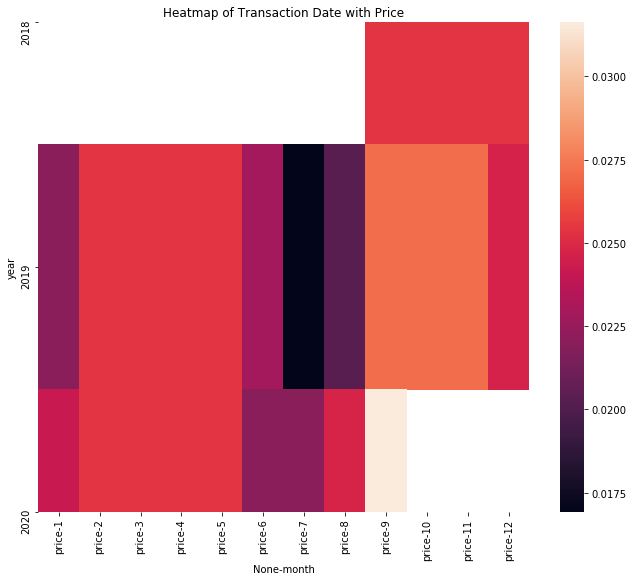

In [47]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_m)
plt.title('Heatmap of Transaction Date with Price', loc='center')
plt.show()